In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Tirar os valores da literatura

In [54]:
Literature_values=pd.read_csv("Literature.csv")
#Literature_values
#Literature_values[Literature_values["Star"]=="Kepler-39"]

## Plots comparing literature values with the simulated by MOOG

#### All the spectrums

In [55]:
All=pd.read_csv("results_simulations.csv")
All
Names_All=[]
for i in range(len(All["Star"])):
    a=str(All["Star"][i])
    Names_All.append(a.split("_HARPS")[0])

for i in range(len(All["Star"])):
    All["Star"][i]=Names_All[i]

All["Star"][68]

/tmp/ipykernel_8097/159619037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All["Star"][i]=Names_All[i]


'HD5278'

In [56]:
### Célula que guarda o valor das variáveis

Mean_All_literature=[]
Median_All_literature=[]
Standart_deviation_All=[]
Nasa_exo_value_All=[]
Error_Nasa_All=[]
N=len(All["Star"])

for i in range(N):

    target_name=All["Star"][i]
    target_value_mean=list(Literature_values[Literature_values["Star"]==target_name]["average: vsini (km/s)"])[0]
    target_value_median=list(Literature_values[Literature_values["Star"]==target_name]["median: vsini (km/s)"])[0]
    target_standart_deviation=list(Literature_values[Literature_values["Star"]==target_name]["standard deviation: vsini (km/s)"])[0]
    nasa_value=list(Literature_values[Literature_values["Star"]==target_name]["nasa: vsini (km/s)"])[0]
    error_nasa=list(Literature_values[Literature_values["Star"]==target_name]["nasa: err_1"])[0]
    
    Mean_All_literature.append(target_value_mean)
    Median_All_literature.append(target_value_median)
    Standart_deviation_All.append(target_standart_deviation)
    Nasa_exo_value_All.append(nasa_value)
    Error_Nasa_All.append(error_nasa)

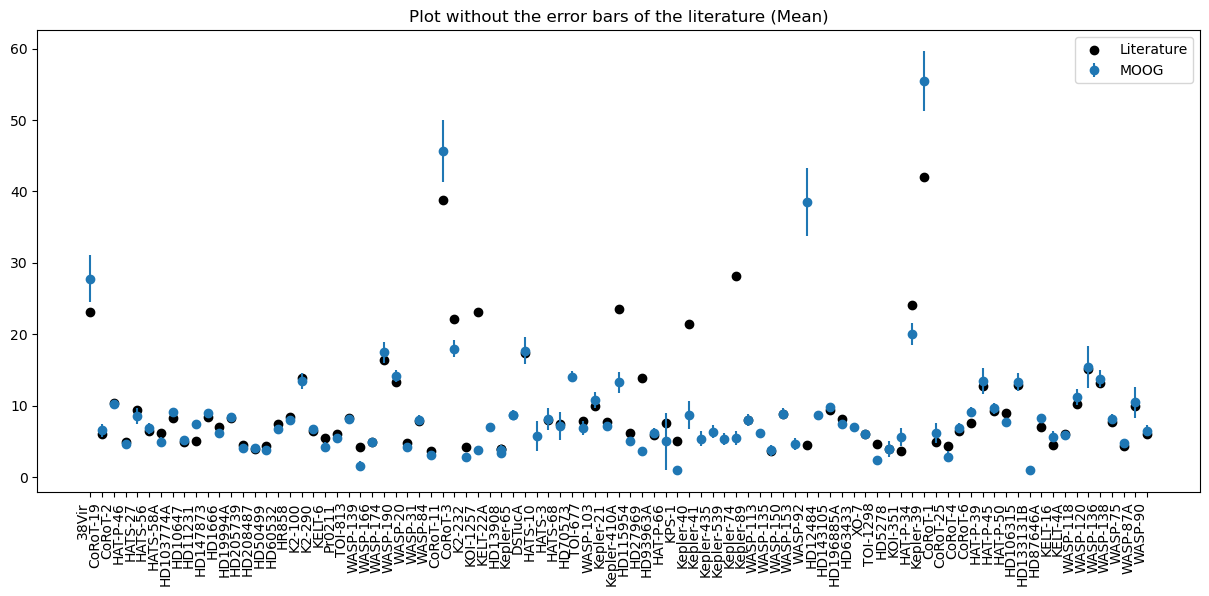

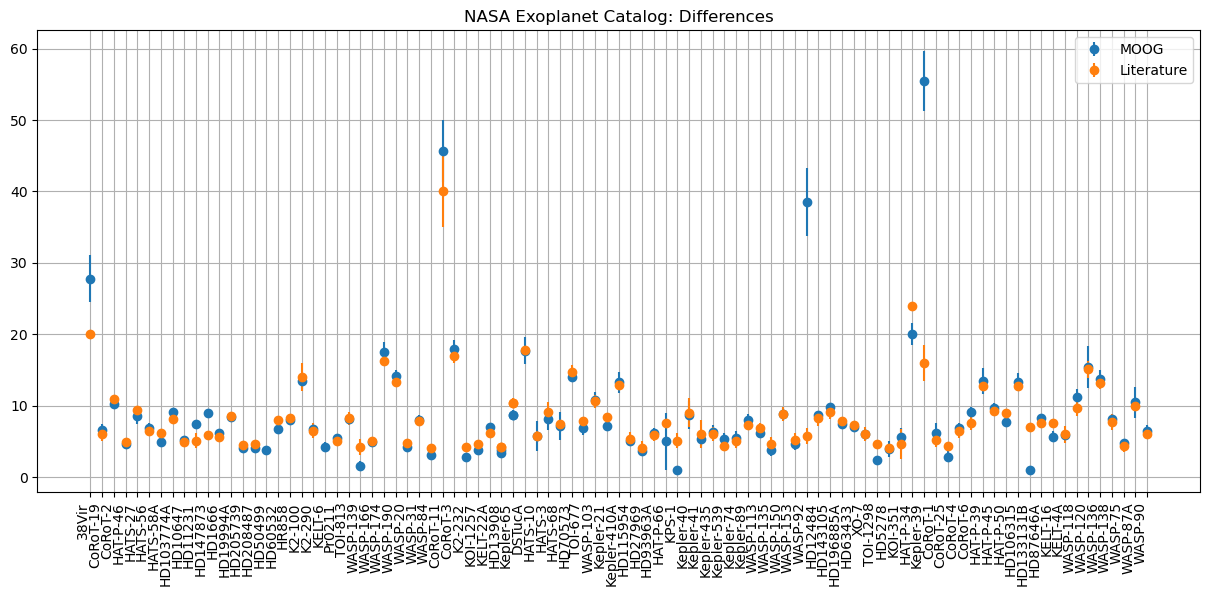

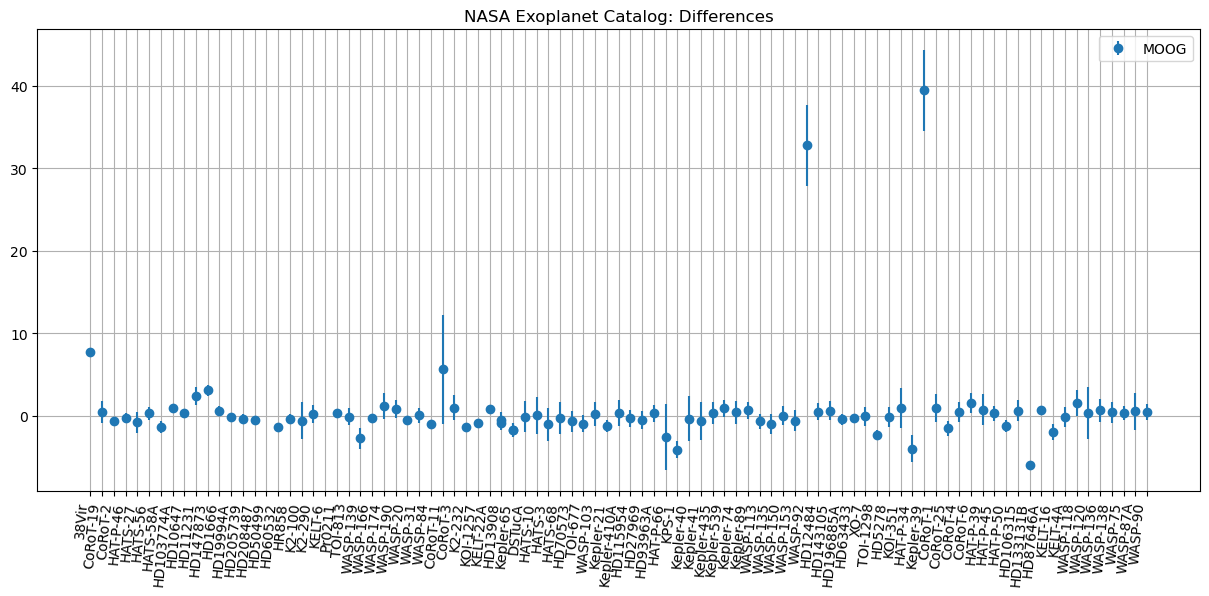

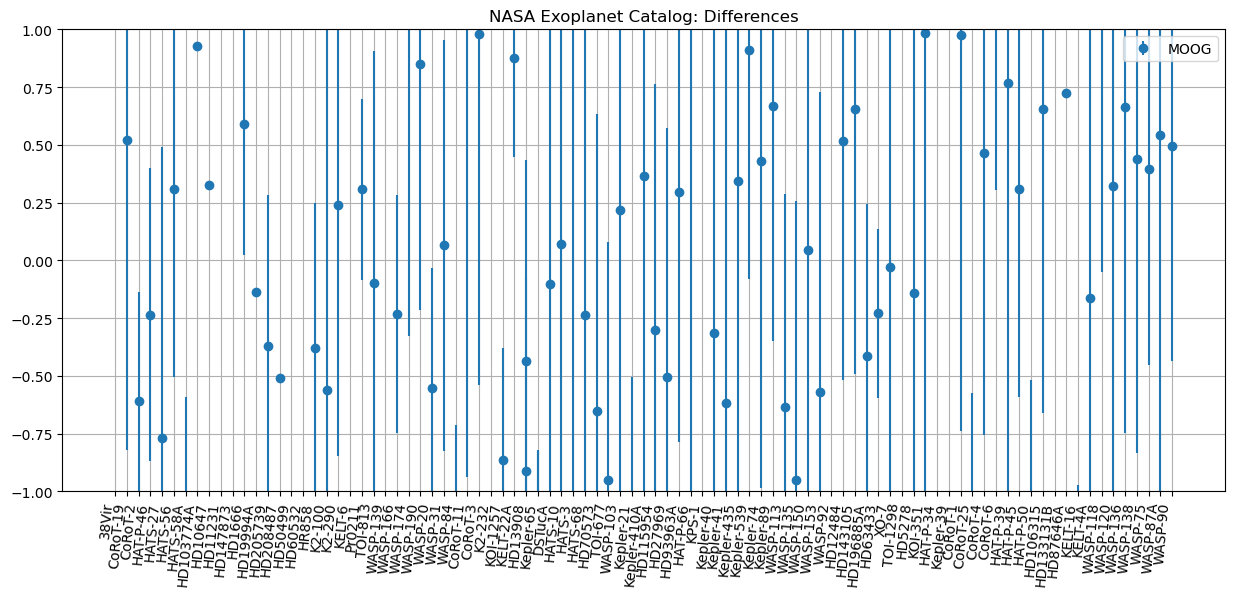

In [57]:
### Plot dos valores da média a comparar com a literatura
###Todas as estrelas

fig, ax = plt.subplots(figsize=(15, 6))

plt.title("Plot without the error bars of the literature (Mean)")
ax.errorbar(list(All["Star"]),list(All["vrot"]),yerr=list(All["vsini_final_err"]), fmt="o",label="MOOG")
ax.scatter(list(All["Star"]),Mean_All_literature,c='k',label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

###Agora do NASA EXOPLANET CATALOG

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA Exoplanet Catalog: Differences")
ax.errorbar(list(All["Star"]),np.array(list(All["vrot"])),yerr=list(All["vsini_final_err"]), fmt="o",label="MOOG")
ax.errorbar(list(All["Star"]),Nasa_exo_value_All,yerr=Error_Nasa_All, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

### NASA EXOPLANET CATALOG with differences

fig, ax = plt.subplots(figsize=(15,6 ))
plt.grid()
plt.title("NASA Exoplanet Catalog: Differences")
ax.errorbar(list(All["Star"]),np.array(list(All["vrot"]))-np.array(Nasa_exo_value_All),yerr=np.sqrt(np.array(list(All["vsini_final_err"]))**2+np.array(Error_Nasa_All)**2), fmt="o",label="MOOG")
#ax.errorbar(list(All["Star"]),Nasa_exo_value_All,yerr=Error_Nasa_All, fmt="o",label="Literature")
plt.xticks(rotation=85, ha='right')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog: Differences")
ax.errorbar(list(All["Star"]),np.array(list(All["vrot"]))-np.array(Nasa_exo_value_All),yerr=np.sqrt(np.array(list(All["vsini_final_err"]))**2+np.array(Error_Nasa_All)**2), fmt="o",label="MOOG")
#ax.errorbar(list(All["Star"]),Nasa_exo_value_All,yerr=Error_Nasa_All, fmt="o",label="Literature")
plt.xticks(rotation=85, ha='right')
plt.ylim(-1,1)
plt.legend()
plt.show()

### Plots utilizando a reta de declive 1, organizando as estrelas pela sua velocidade de rotação

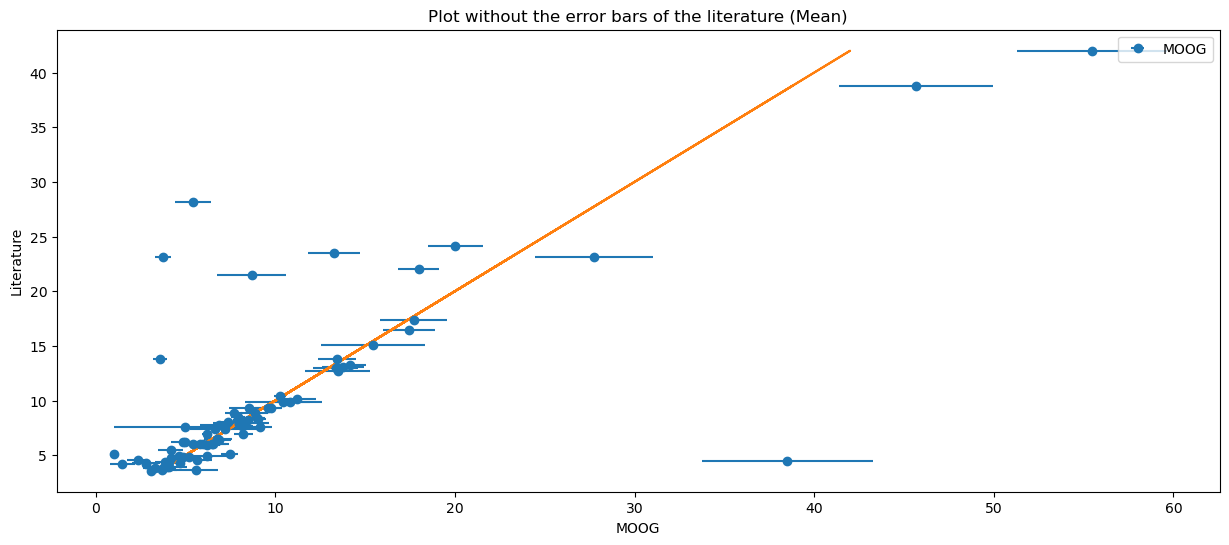

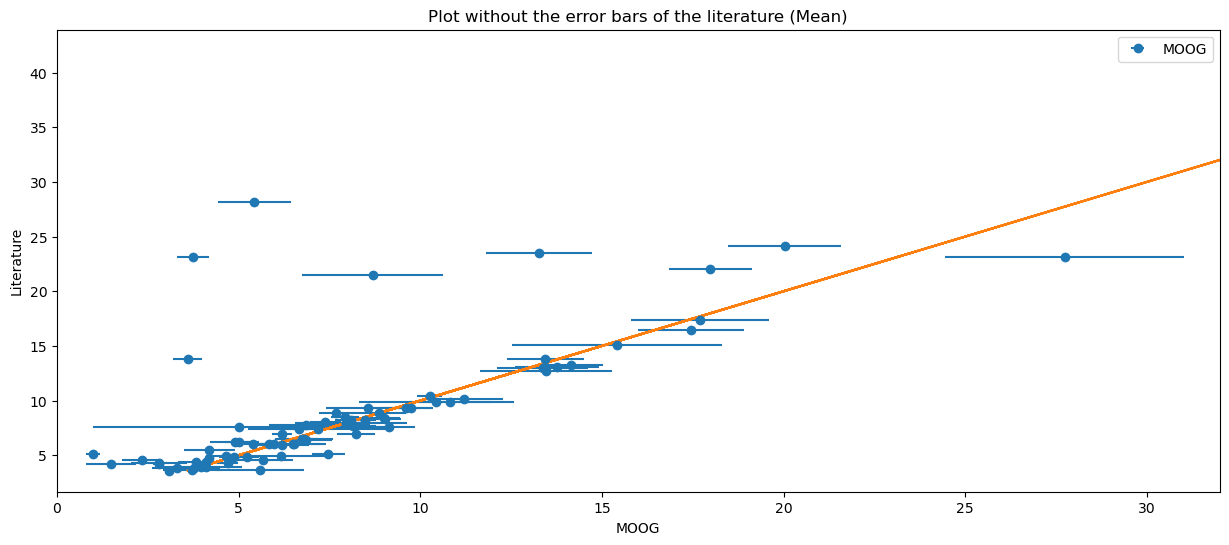

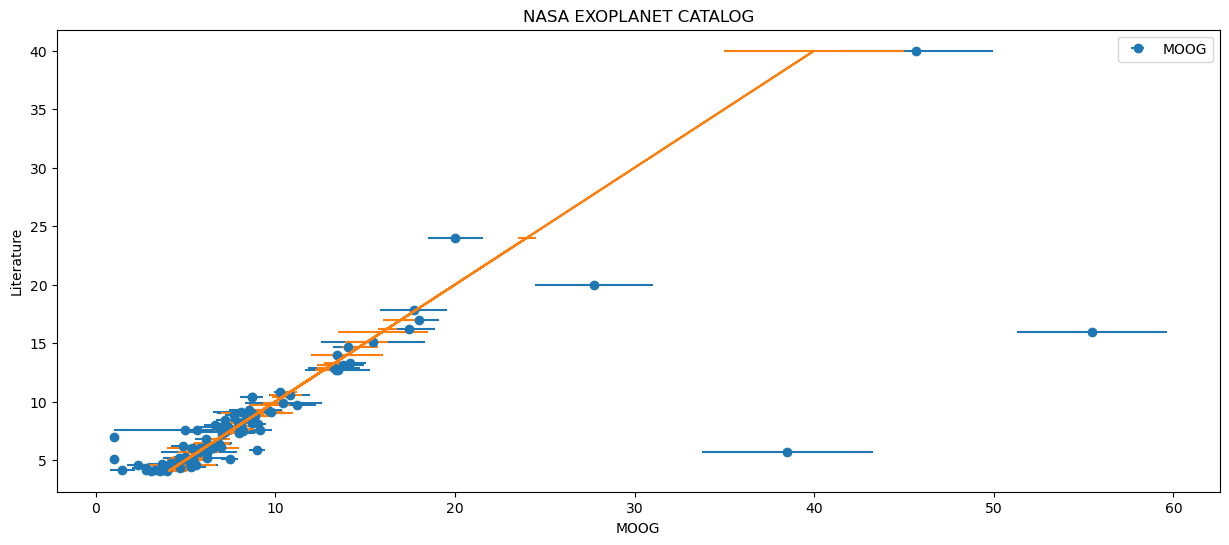

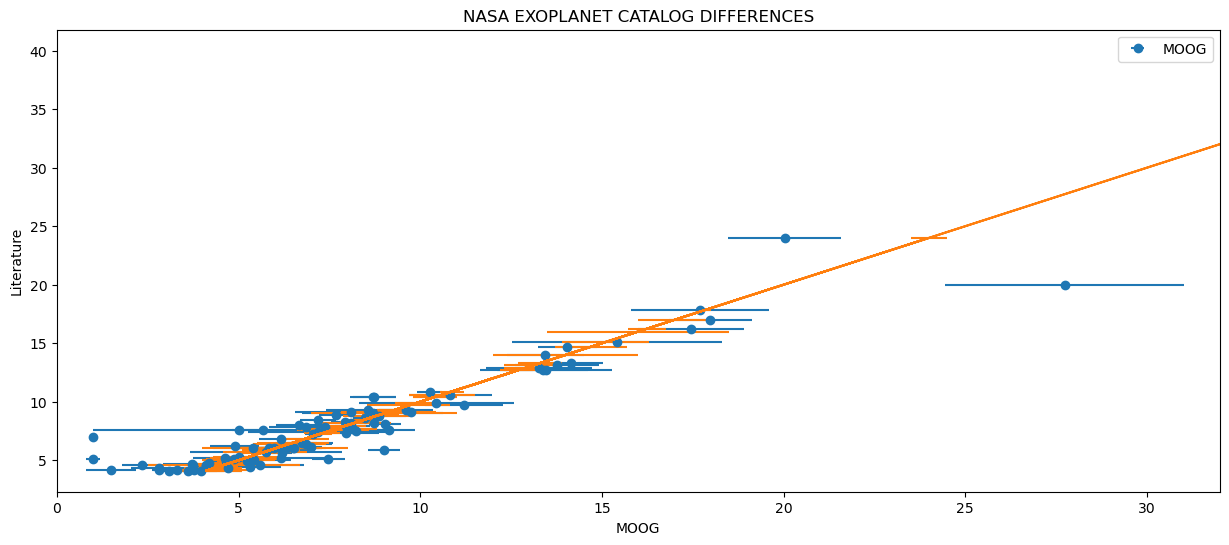

In [58]:
### Agora fazendo só usando o valor da média

fig, ax = plt.subplots(figsize=(15, 6))
plt.title("Plot without the error bars of the literature (Mean)")
ax.errorbar(list(All["vrot"]),Mean_All_literature,xerr=list(All["vsini_final_err"]), fmt="o",label="MOOG")
plt.plot(Mean_All_literature,Mean_All_literature)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.title("Plot without the error bars of the literature (Mean)")
ax.errorbar(list(All["vrot"]),Mean_All_literature,xerr=list(All["vsini_final_err"]), fmt="o",label="MOOG")
plt.plot(Mean_All_literature,Mean_All_literature)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,32)
plt.show()

### Agora com o NASA EXOPLANET CATALOG

fig, ax = plt.subplots(figsize=(15, 6))
plt.title("NASA EXOPLANET CATALOG")
ax.errorbar(list(All["vrot"]),Nasa_exo_value_All,xerr=list(All["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_All,Nasa_exo_value_All,xerr=Error_Nasa_All)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.title("NASA EXOPLANET CATALOG DIFFERENCES")
ax.errorbar(list(All["vrot"]),Nasa_exo_value_All,xerr=list(All["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_All,Nasa_exo_value_All,xerr=Error_Nasa_All)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,32)
plt.show()

### Gráficos tendo em conta o Espetrografo

### HARPS LDC=0.055

In [59]:
###Getting the mean values of the HARPS in the literature
HARPS=All[All["spectograph"]=="HARPS"]

Mean_HARPS_literature=[]
Median_HARPS_literature=[]
Standart_HARPS_literature=[]
Nasa_exo_value_HARPS=[]
Error_Nasa_HARPS=[]

for i in range(0,len(HARPS['Star'])):
    
    target_name=HARPS["Star"][i]
    target_value_mean=list(Literature_values[Literature_values["Star"]==target_name]["average: vsini (km/s)"])[0]
    target_standart_deviation=list(Literature_values[Literature_values["Star"]==target_name]["standard deviation: vsini (km/s)"])[0]
    nasa_value=list(Literature_values[Literature_values["Star"]==target_name]["nasa: vsini (km/s)"])[0]
    error_nasa=list(Literature_values[Literature_values["Star"]==target_name]["nasa: err_1"])[0]
    
    Mean_HARPS_literature.append(target_value_mean)
    Standart_HARPS_literature.append(target_standart_deviation)
    Nasa_exo_value_HARPS.append(nasa_value)
    Error_Nasa_HARPS.append(error_nasa)
    


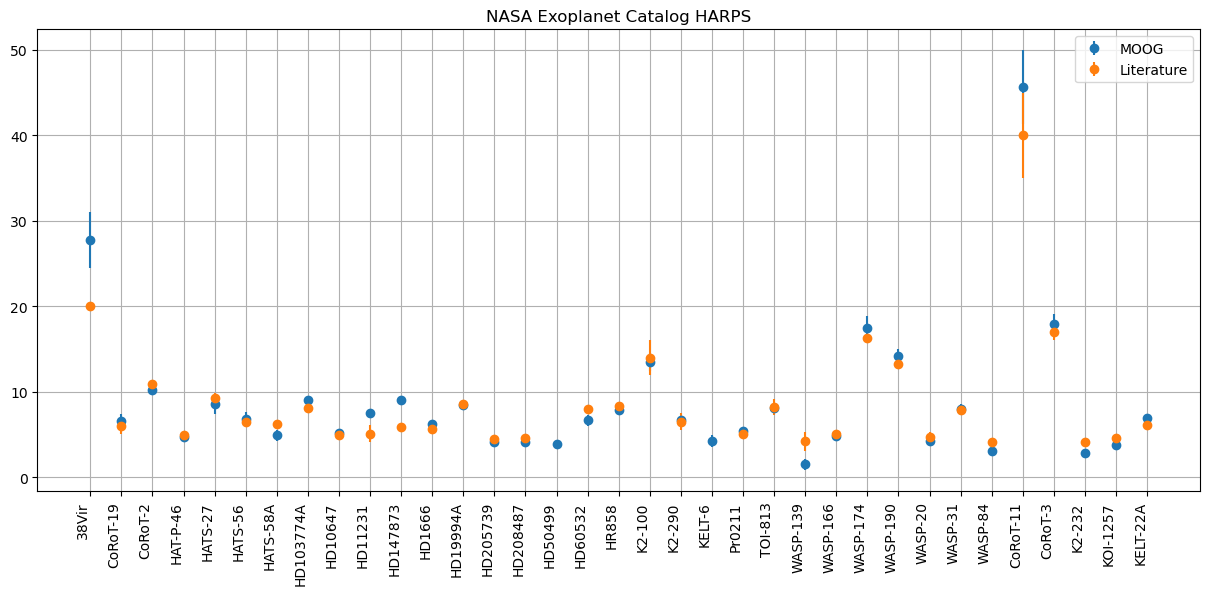

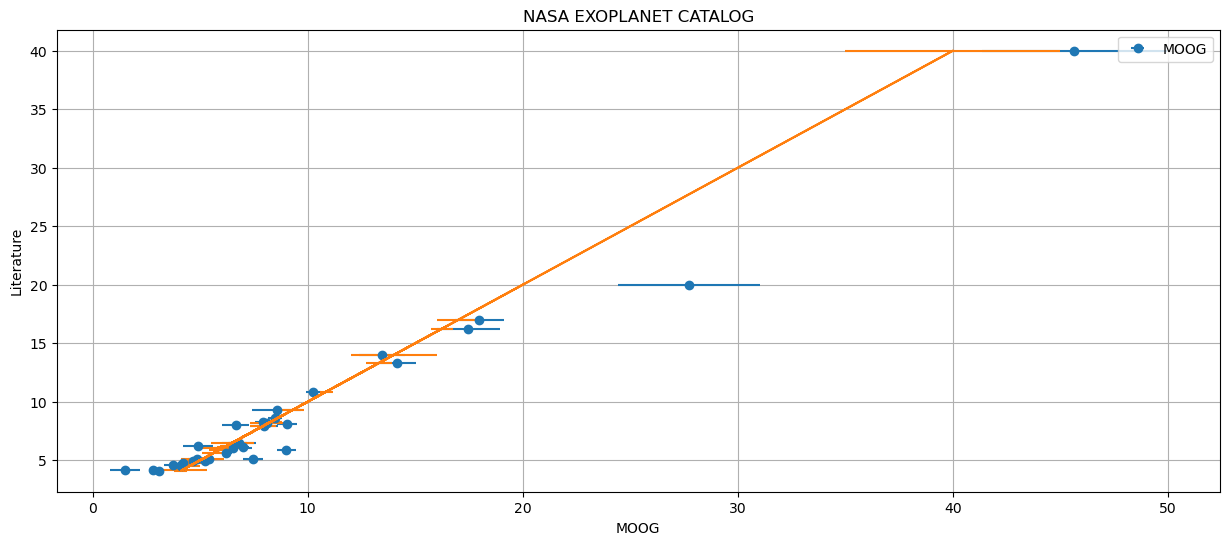

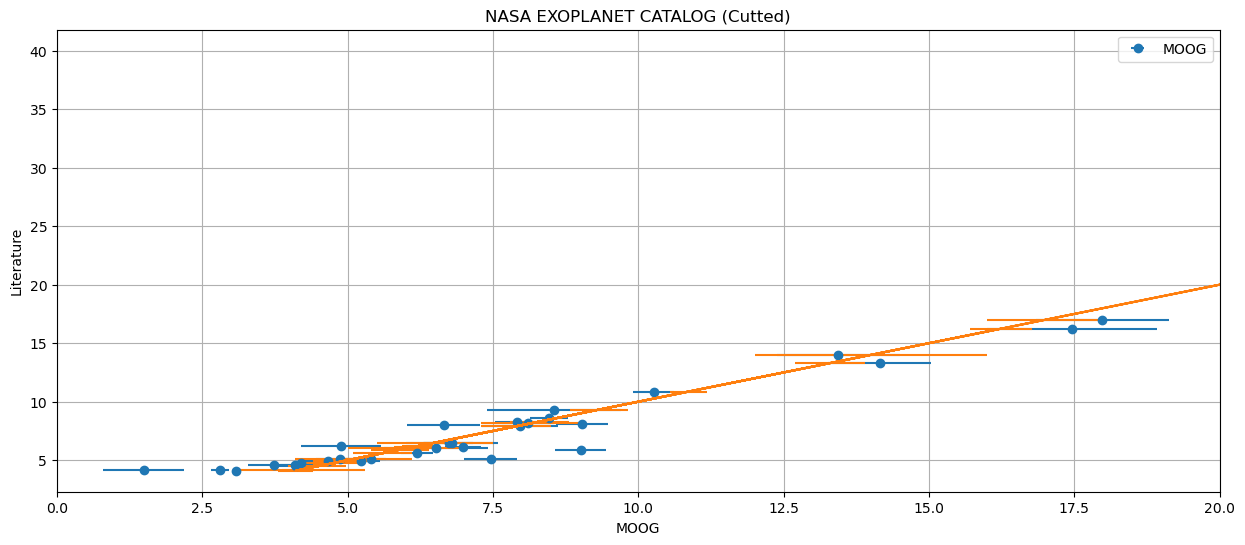

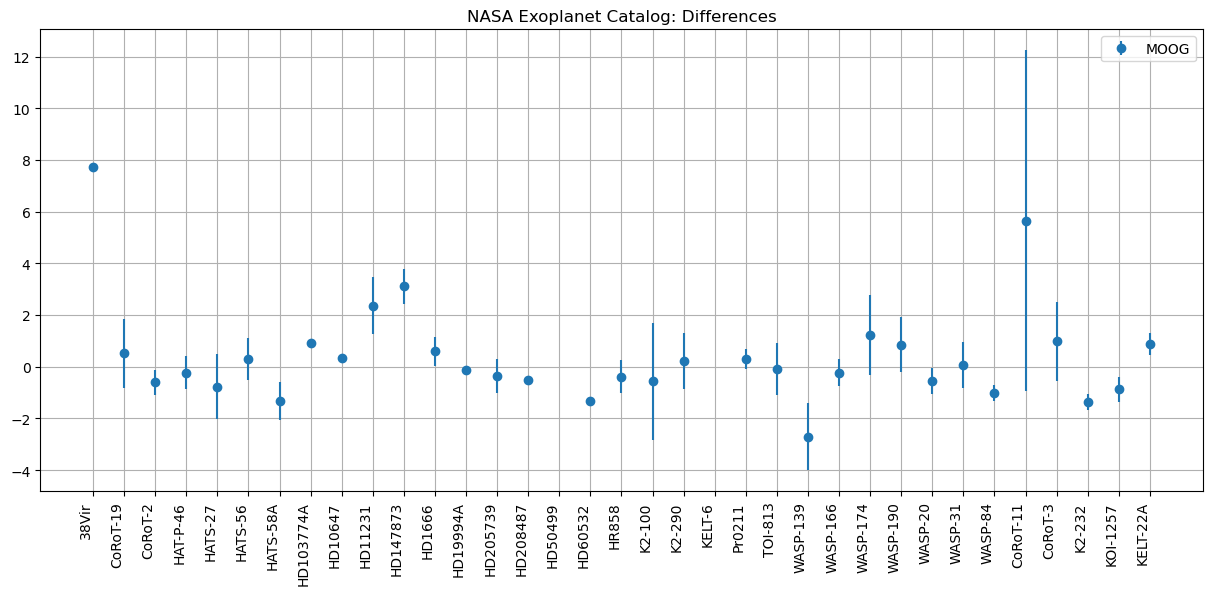

In [60]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA Exoplanet Catalog HARPS")
ax.errorbar(list(HARPS["Star"]),np.array(list(HARPS["vrot"])),yerr=list(HARPS["vsini_final_err"]), fmt="o",label="MOOG")
ax.errorbar(list(HARPS["Star"]),Nasa_exo_value_HARPS,yerr=Error_Nasa_HARPS, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG")
ax.errorbar(list(HARPS["vrot"]),Nasa_exo_value_HARPS,xerr=list(HARPS["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_HARPS,Nasa_exo_value_HARPS,xerr=Error_Nasa_HARPS)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG (Cutted)")
ax.errorbar(list(HARPS["vrot"]),Nasa_exo_value_HARPS,xerr=list(HARPS["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_HARPS,Nasa_exo_value_HARPS,xerr=Error_Nasa_HARPS)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,20)
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog: Differences")
ax.errorbar(list(HARPS["Star"]),np.array(list(HARPS["vrot"]))-np.array(Nasa_exo_value_HARPS),yerr=np.sqrt(np.array(list(HARPS["vsini_final_err"]))**2+np.array(Error_Nasa_HARPS)**2), fmt="o",label="MOOG")
#ax.errorbar(list(All["Star"]),Nasa_exo_value_All,yerr=Error_Nasa_All, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')

plt.legend()
plt.show()

### SOPHIE_HE = 0.135



In [61]:
###Getting the mean values of the HARPS in the literature
SOPHIE_HE=All[All["spectograph"]=="SOPHIE_HE"]

Mean_SOPHIE_HE_literature=[]
Median_SOPHIE_HE_literature=[]
Standart_SOPHIE_HE_literature=[]
Nasa_exo_value_SOPHIE_HE=[]
Error_Nasa_SOPHIE_HE=[]


for i in range(len(list(SOPHIE_HE['Star']))):
    target_name=list(SOPHIE_HE["Star"])[i]
    target_value_mean=list(Literature_values[Literature_values["Star"]==target_name]["average: vsini (km/s)"])[0]
    target_standart_deviation=list(Literature_values[Literature_values["Star"]==target_name]["standard deviation: vsini (km/s)"])[0]
    nasa_value=list(Literature_values[Literature_values["Star"]==target_name]["nasa: vsini (km/s)"])[0]
    error_nasa=list(Literature_values[Literature_values["Star"]==target_name]["nasa: err_1"])[0]
    
    Mean_SOPHIE_HE_literature.append(target_value_mean)
    Standart_SOPHIE_HE_literature.append(target_standart_deviation)
    Nasa_exo_value_SOPHIE_HE.append(nasa_value)
    Error_Nasa_SOPHIE_HE.append(error_nasa)

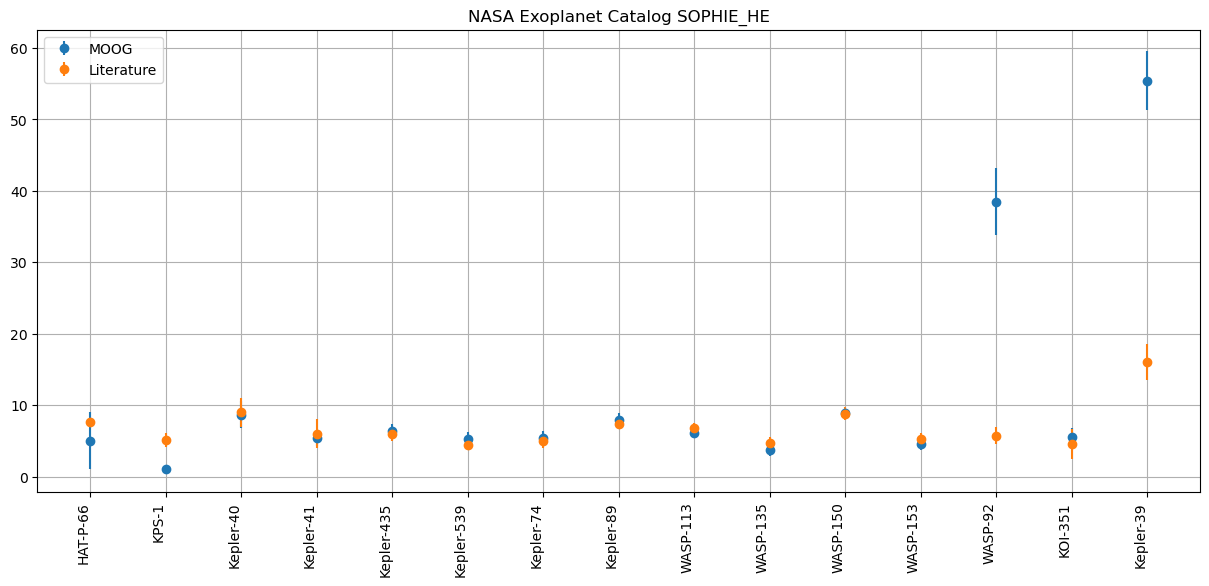

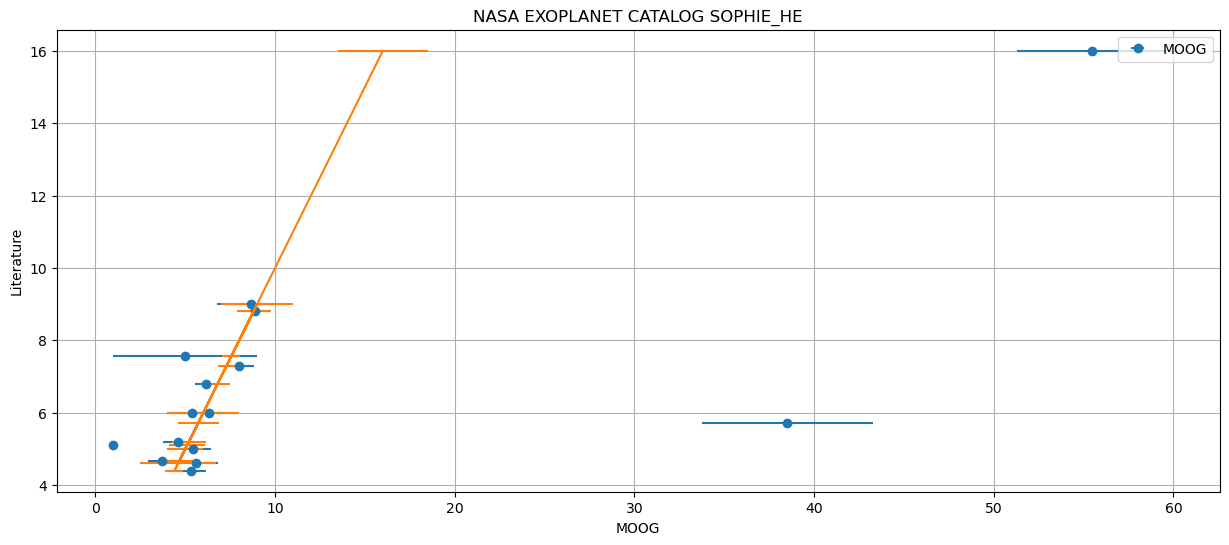

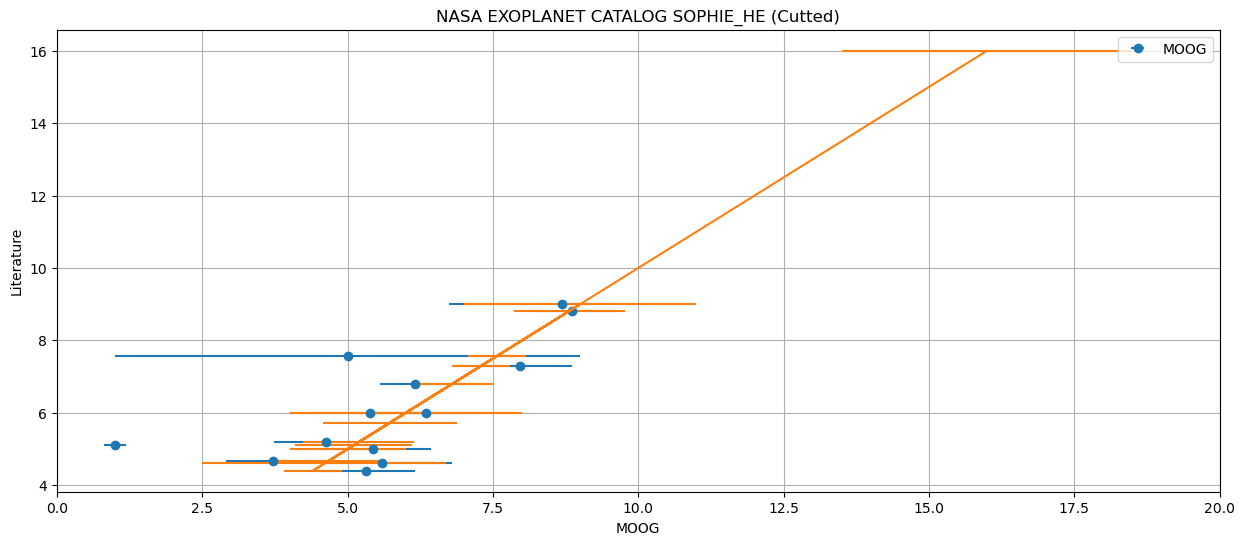

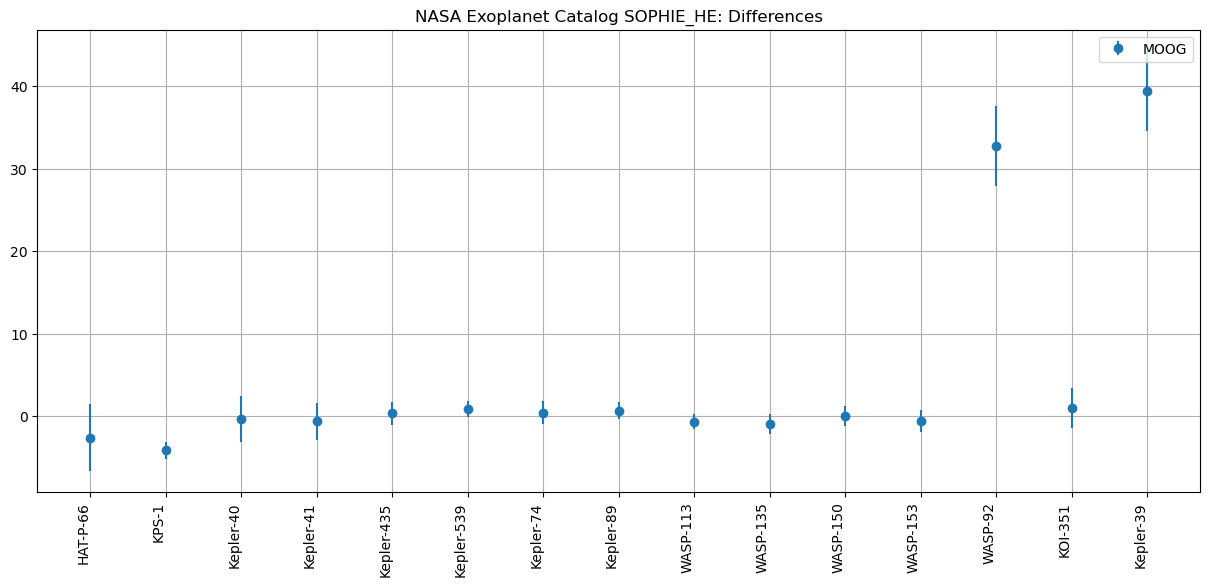

In [62]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA Exoplanet Catalog SOPHIE_HE")
ax.errorbar(list(SOPHIE_HE["Star"]),np.array(list(SOPHIE_HE["vrot"])),yerr=list(SOPHIE_HE["vsini_final_err"]), fmt="o",label="MOOG")
ax.errorbar(list(SOPHIE_HE["Star"]),Nasa_exo_value_SOPHIE_HE,yerr=Error_Nasa_SOPHIE_HE, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG SOPHIE_HE")
ax.errorbar(list(SOPHIE_HE["vrot"]),Nasa_exo_value_SOPHIE_HE,xerr=list(SOPHIE_HE["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_SOPHIE_HE,Nasa_exo_value_SOPHIE_HE,xerr=Error_Nasa_SOPHIE_HE)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG SOPHIE_HE (Cutted)")
ax.errorbar(list(SOPHIE_HE["vrot"]),Nasa_exo_value_SOPHIE_HE,xerr=list(SOPHIE_HE["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_SOPHIE_HE,Nasa_exo_value_SOPHIE_HE,xerr=Error_Nasa_SOPHIE_HE)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,20)
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog SOPHIE_HE: Differences")
ax.errorbar(list(SOPHIE_HE["Star"]),np.array(list(SOPHIE_HE["vrot"]))-np.array(Nasa_exo_value_SOPHIE_HE),yerr=np.sqrt(np.array(list(SOPHIE_HE["vsini_final_err"]))**2+np.array(Error_Nasa_SOPHIE_HE)**2), fmt="o",label="MOOG")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

### SOPHIE_HR = 0.072


In [63]:
###Getting the mean values of the HARPS in the literature
SOPHIE_HR=All[All["spectograph"]=="SOPHIE_HR"]

Mean_SOPHIE_HR_literature=[]
Median_SOPHIE_HR_literature=[]
Standart_SOPHIE_HR_literature=[]
Nasa_exo_value_SOPHIE_HR=[]
Error_Nasa_SOPHIE_HR=[]


for i in range(len(list(SOPHIE_HR['Star']))):
    target_name=list(SOPHIE_HR["Star"])[i]
    target_value_mean=list(Literature_values[Literature_values["Star"]==target_name]["average: vsini (km/s)"])[0]
    target_standart_deviation=list(Literature_values[Literature_values["Star"]==target_name]["standard deviation: vsini (km/s)"])[0]
    nasa_value=list(Literature_values[Literature_values["Star"]==target_name]["nasa: vsini (km/s)"])[0]
    error_nasa=list(Literature_values[Literature_values["Star"]==target_name]["nasa: err_1"])[0]
    
    Mean_SOPHIE_HR_literature.append(target_value_mean)
    Standart_SOPHIE_HR_literature.append(target_standart_deviation)
    Nasa_exo_value_SOPHIE_HR.append(nasa_value)
    Error_Nasa_SOPHIE_HR.append(error_nasa)

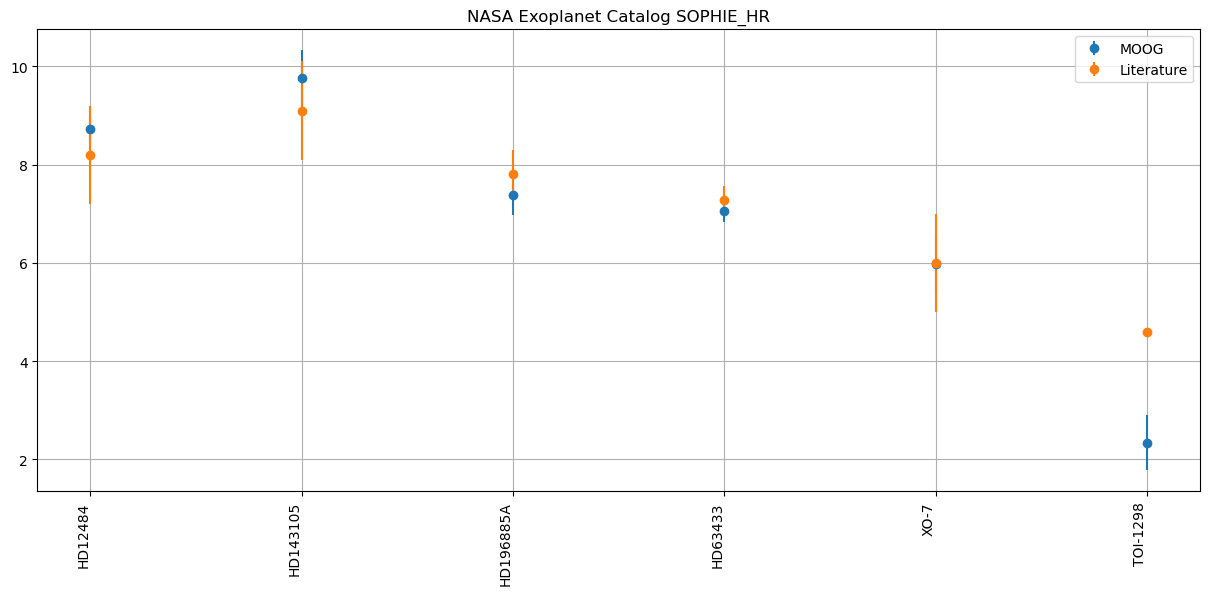

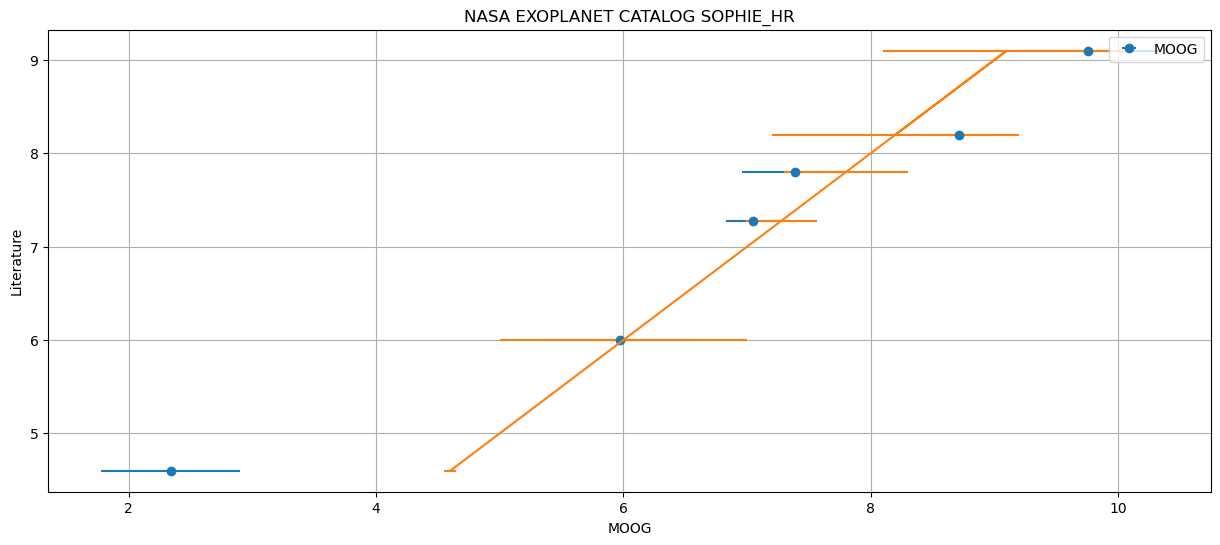

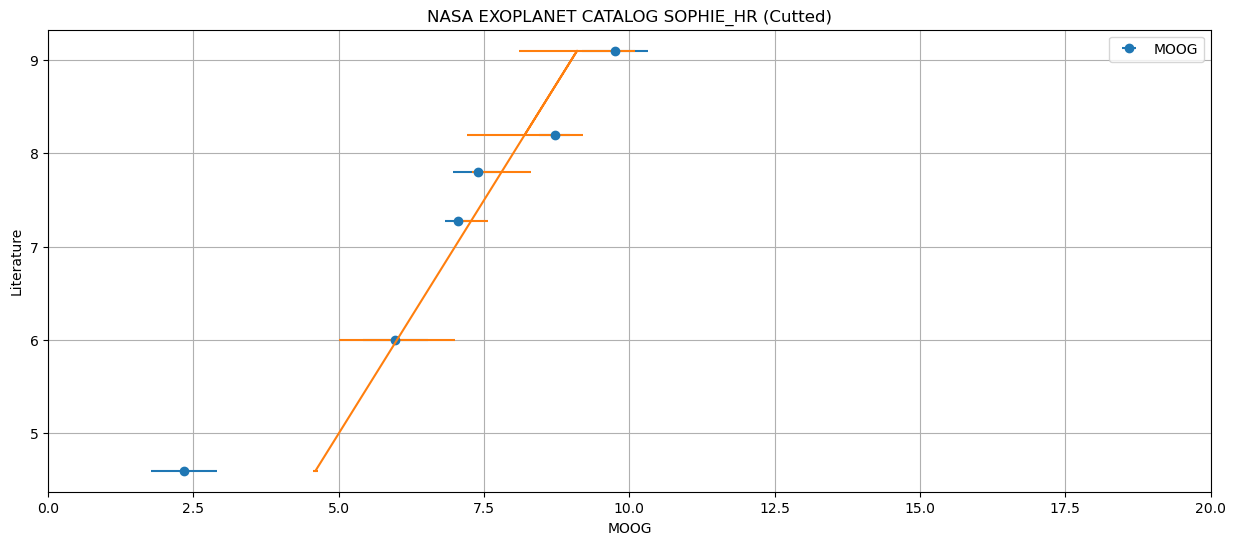

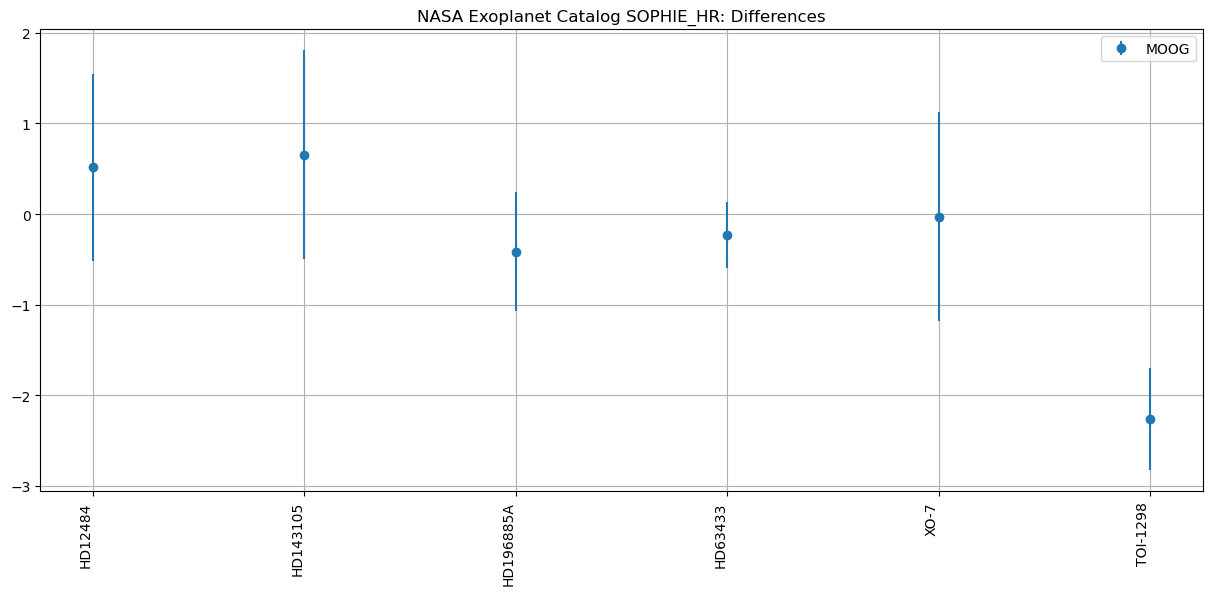

In [64]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA Exoplanet Catalog SOPHIE_HR")
ax.errorbar(list(SOPHIE_HR["Star"]),np.array(list(SOPHIE_HR["vrot"])),yerr=list(SOPHIE_HR["vsini_final_err"]), fmt="o",label="MOOG")
ax.errorbar(list(SOPHIE_HR["Star"]),Nasa_exo_value_SOPHIE_HR,yerr=Error_Nasa_SOPHIE_HR, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG SOPHIE_HR")
ax.errorbar(list(SOPHIE_HR["vrot"]),Nasa_exo_value_SOPHIE_HR,xerr=list(SOPHIE_HR["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_SOPHIE_HR,Nasa_exo_value_SOPHIE_HR,xerr=Error_Nasa_SOPHIE_HR)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG SOPHIE_HR (Cutted)")
ax.errorbar(list(SOPHIE_HR["vrot"]),Nasa_exo_value_SOPHIE_HR,xerr=list(SOPHIE_HR["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_SOPHIE_HR,Nasa_exo_value_SOPHIE_HR,xerr=Error_Nasa_SOPHIE_HR)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,20)
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()

plt.title("NASA Exoplanet Catalog SOPHIE_HR: Differences")
ax.errorbar(list(SOPHIE_HR["Star"]),np.array(list(SOPHIE_HR["vrot"]))-np.array(Nasa_exo_value_SOPHIE_HR),yerr=np.sqrt(np.array(list(SOPHIE_HR["vsini_final_err"]))**2+np.array(Error_Nasa_SOPHIE_HR)**2), fmt="o",label="MOOG")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

### SOPHIE = 0.075

In [65]:
###Getting the mean values of the HARPS in the literature
SOPHIE=All[All["spectograph"]=="SOPHIE"]

Mean_SOPHIE_literature=[]
Median_SOPHIE_literature=[]
Standart_SOPHIE_literature=[]
Nasa_exo_value_SOPHIE=[]
Error_Nasa_SOPHIE=[]


for i in range(len(list(SOPHIE['Star']))):
    target_name=list(SOPHIE["Star"])[i]
    target_value_mean=list(Literature_values[Literature_values["Star"]==target_name]["average: vsini (km/s)"])[0]
    target_standart_deviation=list(Literature_values[Literature_values["Star"]==target_name]["standard deviation: vsini (km/s)"])[0]
    nasa_value=list(Literature_values[Literature_values["Star"]==target_name]["nasa: vsini (km/s)"])[0]
    error_nasa=list(Literature_values[Literature_values["Star"]==target_name]["nasa: err_1"])[0]
    
    Mean_SOPHIE_literature.append(target_value_mean)
    Standart_SOPHIE_literature.append(target_standart_deviation)
    Nasa_exo_value_SOPHIE.append(nasa_value)
    Error_Nasa_SOPHIE.append(error_nasa)

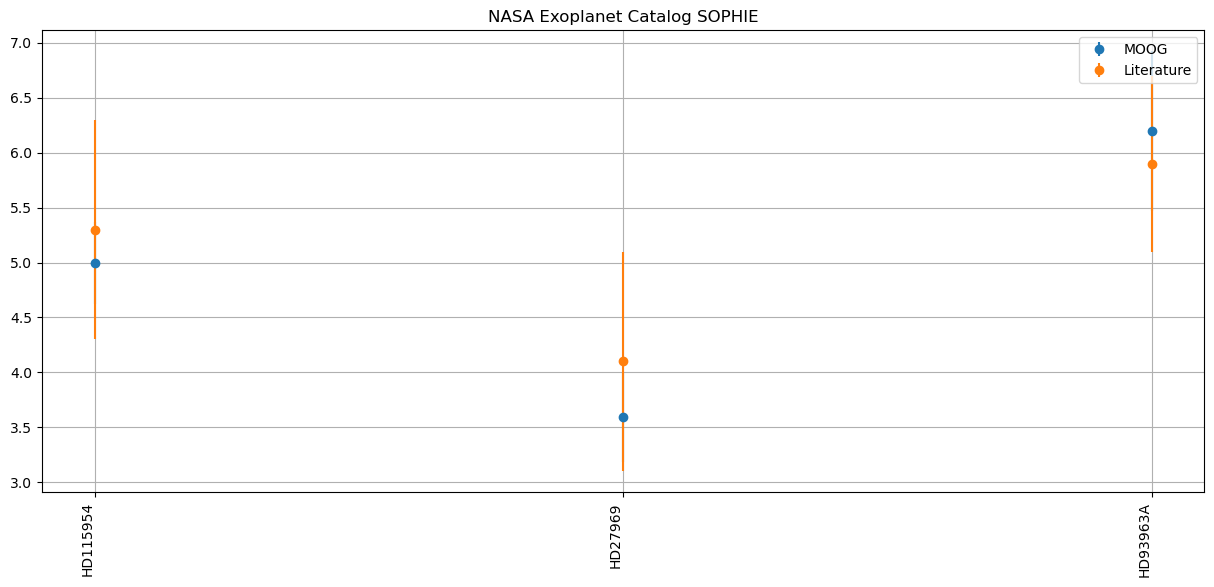

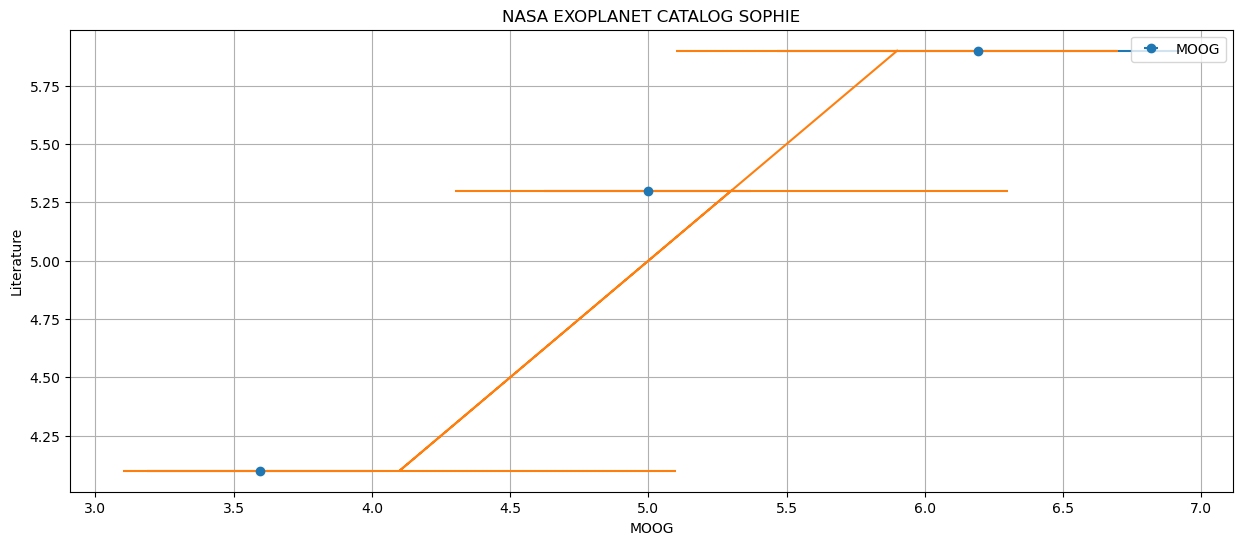

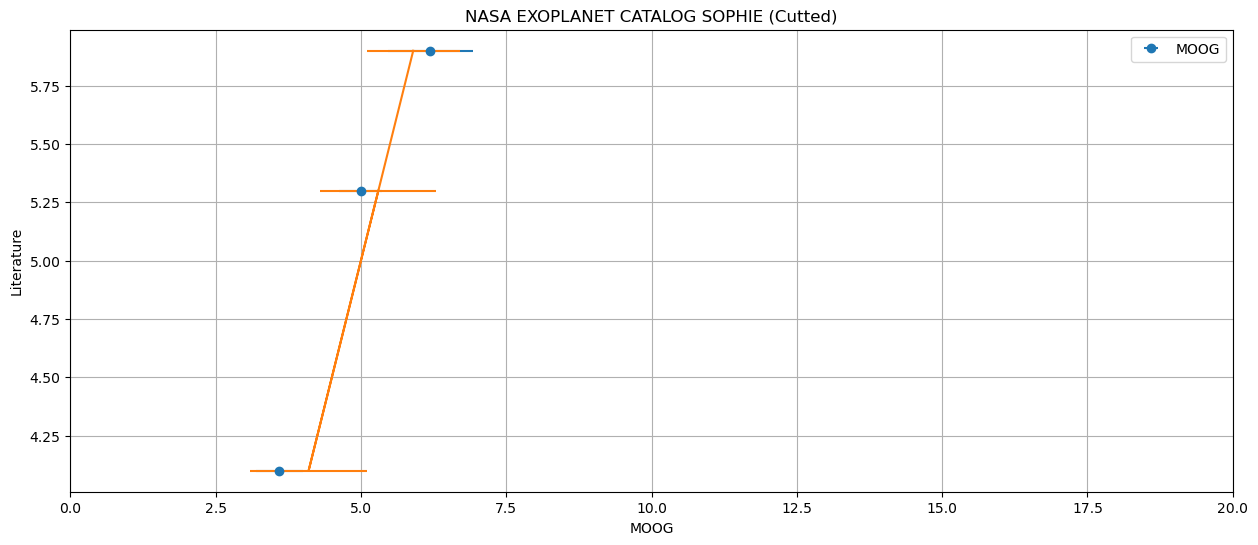

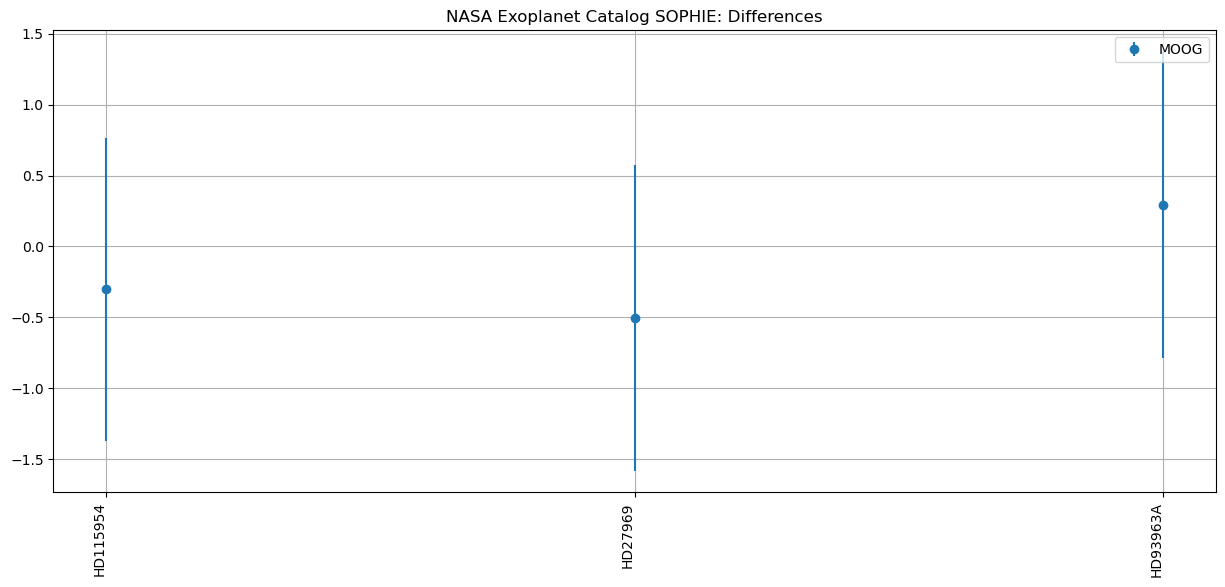

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA Exoplanet Catalog SOPHIE")
ax.errorbar(list(SOPHIE["Star"]),np.array(list(SOPHIE["vrot"])),yerr=list(SOPHIE["vsini_final_err"]), fmt="o",label="MOOG")
ax.errorbar(list(SOPHIE["Star"]),Nasa_exo_value_SOPHIE,yerr=Error_Nasa_SOPHIE, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG SOPHIE")
ax.errorbar(list(SOPHIE["vrot"]),Nasa_exo_value_SOPHIE,xerr=list(SOPHIE["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_SOPHIE,Nasa_exo_value_SOPHIE,xerr=Error_Nasa_SOPHIE)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG SOPHIE (Cutted)")
ax.errorbar(list(SOPHIE["vrot"]),Nasa_exo_value_SOPHIE,xerr=list(SOPHIE["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_SOPHIE,Nasa_exo_value_SOPHIE,xerr=Error_Nasa_SOPHIE)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,20)
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog SOPHIE: Differences")
ax.errorbar(list(SOPHIE["Star"]),np.array(list(SOPHIE["vrot"]))-np.array(Nasa_exo_value_SOPHIE),yerr=np.sqrt(np.array(list(SOPHIE["vsini_final_err"]))**2+np.array(Error_Nasa_SOPHIE)**2), fmt="o",label="MOOG")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

### FEROS = 0.13

In [67]:
###Getting the mean values of the HARPS in the literature
FEROS=All[All["spectograph"]=="FEROS"]

Mean_FEROS_literature=[]
Median_FEROS_literature=[]
Standart_FEROS_literature=[]
Nasa_exo_value_FEROS=[]
Error_Nasa_FEROS=[]


for i in range(len(list(FEROS['Star']))):
    target_name=list(FEROS["Star"])[i]
    target_value_mean=list(Literature_values[Literature_values["Star"]==target_name]["average: vsini (km/s)"])[0]
    target_standart_deviation=list(Literature_values[Literature_values["Star"]==target_name]["standard deviation: vsini (km/s)"])[0]
    nasa_value=list(Literature_values[Literature_values["Star"]==target_name]["nasa: vsini (km/s)"])[0]
    error_nasa=list(Literature_values[Literature_values["Star"]==target_name]["nasa: err_1"])[0]
    
    Mean_FEROS_literature.append(target_value_mean)
    Standart_FEROS_literature.append(target_standart_deviation)
    Nasa_exo_value_FEROS.append(nasa_value)
    Error_Nasa_FEROS.append(error_nasa)

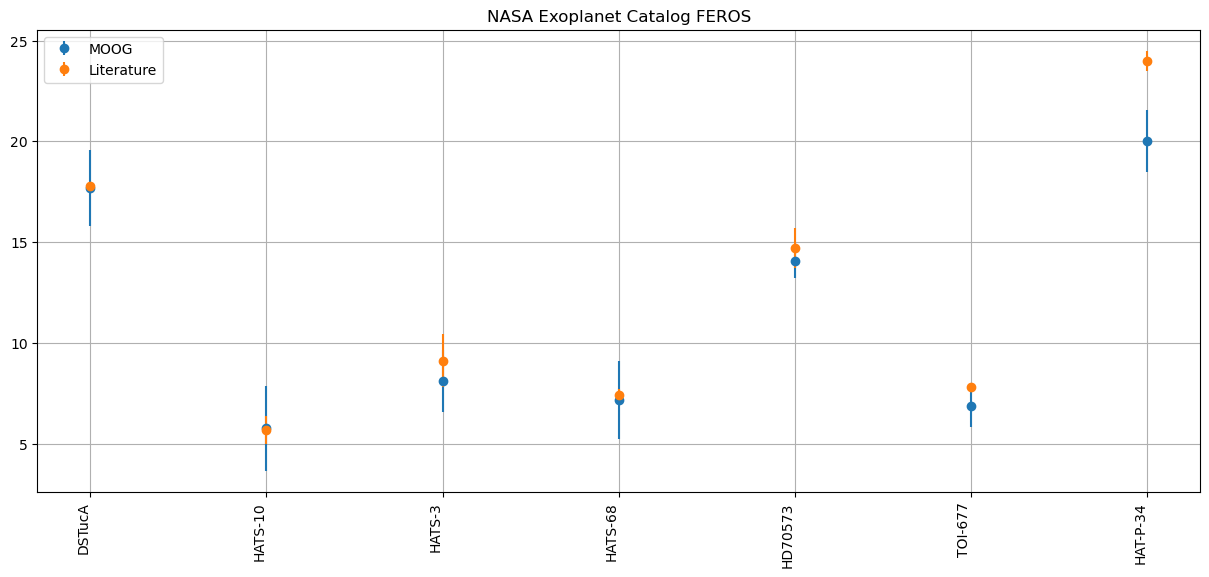

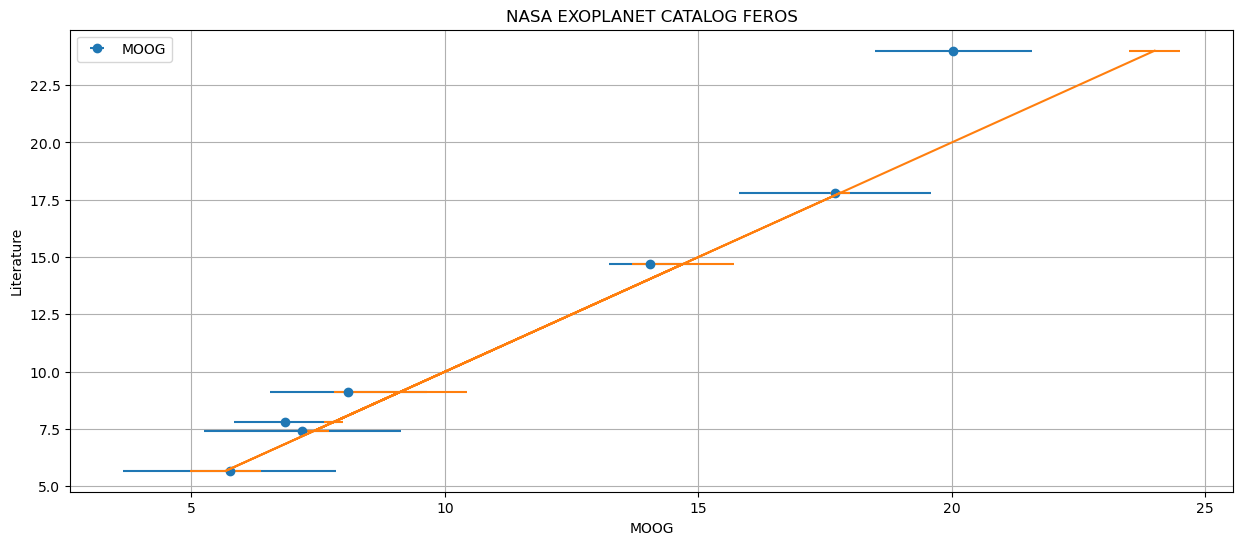

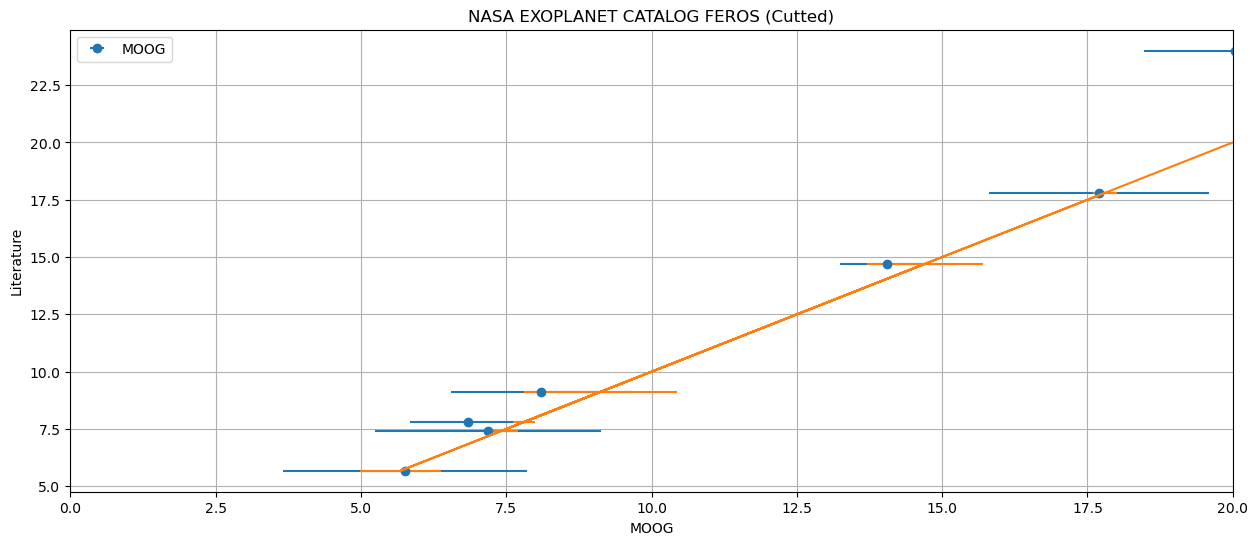

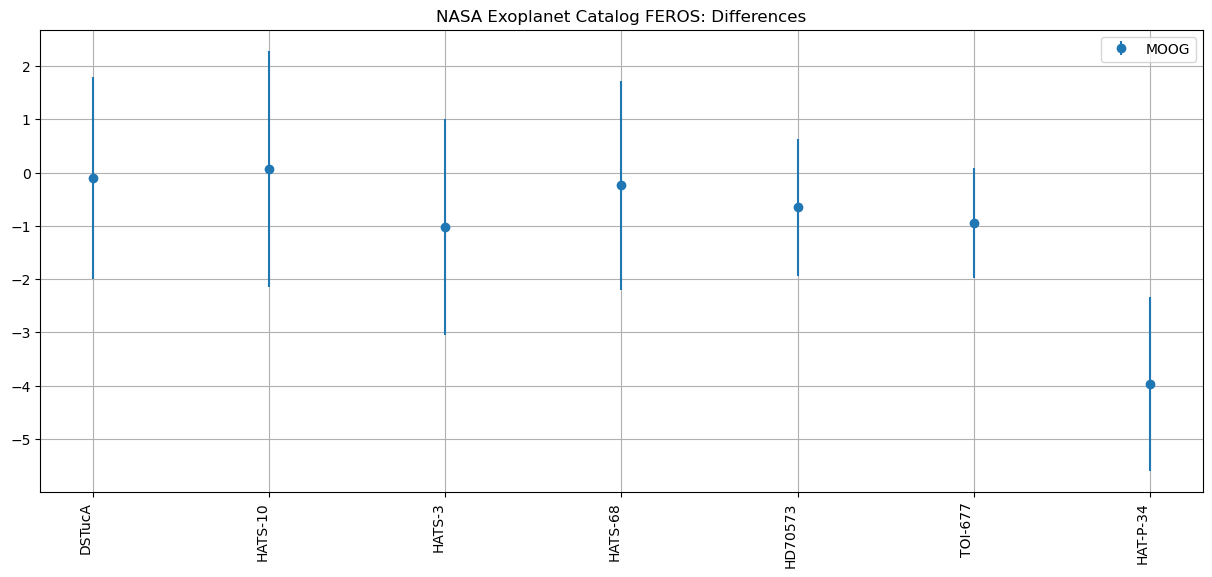

In [68]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA Exoplanet Catalog FEROS")
ax.errorbar(list(FEROS["Star"]),np.array(list(FEROS["vrot"])),yerr=list(FEROS["vsini_final_err"]), fmt="o",label="MOOG")
ax.errorbar(list(FEROS["Star"]),Nasa_exo_value_FEROS,yerr=Error_Nasa_FEROS, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG FEROS")
ax.errorbar(list(FEROS["vrot"]),Nasa_exo_value_FEROS,xerr=list(FEROS["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_FEROS,Nasa_exo_value_FEROS,xerr=Error_Nasa_FEROS)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG FEROS (Cutted)")
ax.errorbar(list(FEROS["vrot"]),Nasa_exo_value_FEROS,xerr=list(FEROS["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_FEROS,Nasa_exo_value_FEROS,xerr=Error_Nasa_FEROS)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,20)
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog FEROS: Differences")
ax.errorbar(list(FEROS["Star"]),np.array(list(FEROS["vrot"]))-np.array(Nasa_exo_value_FEROS),yerr=np.sqrt(np.array(list(FEROS["vsini_final_err"]))**2+np.array(Error_Nasa_FEROS)**2), fmt="o",label="MOOG")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

### ESPADONS = 0.097

In [69]:
###Getting the mean values of the HARPS in the literature
ESPADONS=All[All["spectograph"]=="ESPADONS"]

Mean_ESPADONS_literature=[]
Median_ESPADONS_literature=[]
Standart_ESPADONS_literature=[]
Nasa_exo_value_ESPADONS=[]
Error_Nasa_ESPADONS=[]


for i in range(len(list(ESPADONS['Star']))):
    target_name=list(ESPADONS["Star"])[i]
    target_value_mean=list(Literature_values[Literature_values["Star"]==target_name]["average: vsini (km/s)"])[0]
    target_standart_deviation=list(Literature_values[Literature_values["Star"]==target_name]["standard deviation: vsini (km/s)"])[0]
    nasa_value=list(Literature_values[Literature_values["Star"]==target_name]["nasa: vsini (km/s)"])[0]
    error_nasa=list(Literature_values[Literature_values["Star"]==target_name]["nasa: err_1"])[0]
    
    Mean_ESPADONS_literature.append(target_value_mean)
    Standart_ESPADONS_literature.append(target_standart_deviation)
    Nasa_exo_value_ESPADONS.append(nasa_value)
    Error_Nasa_ESPADONS.append(error_nasa)

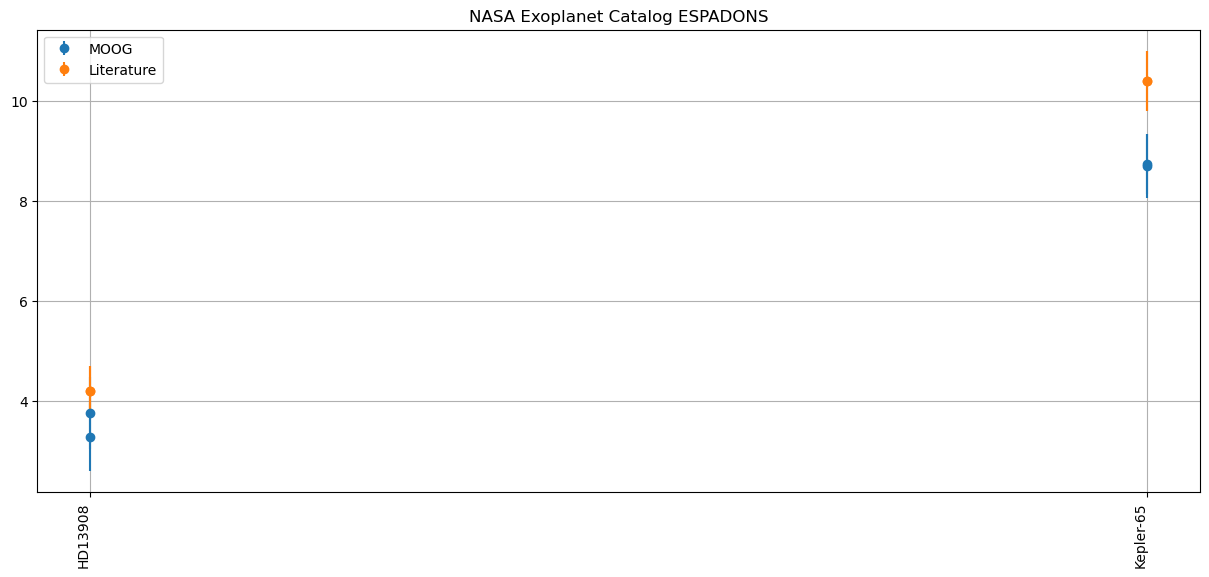

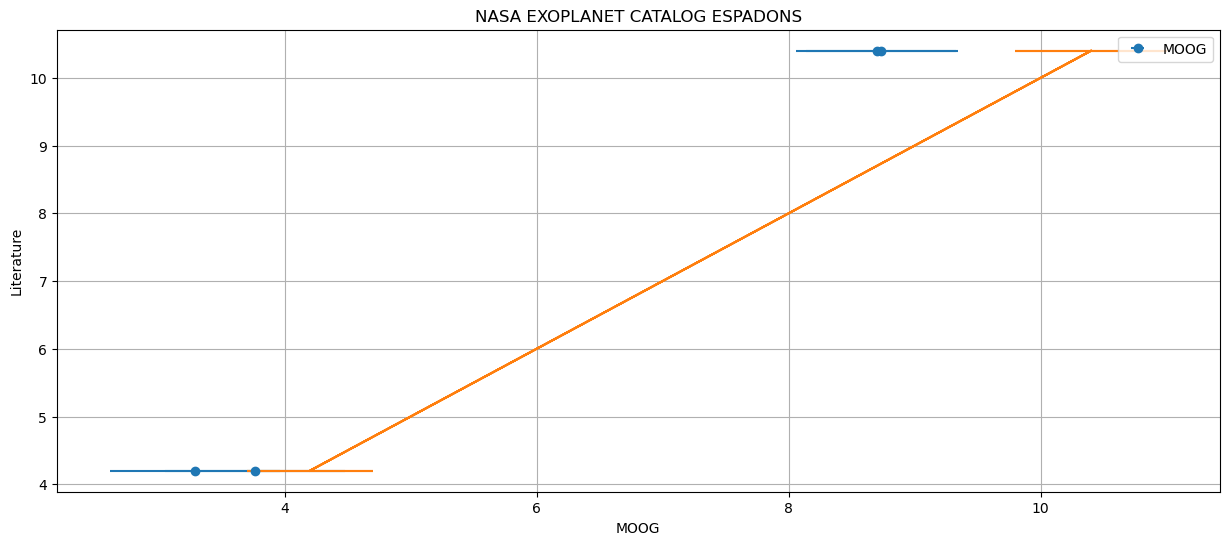

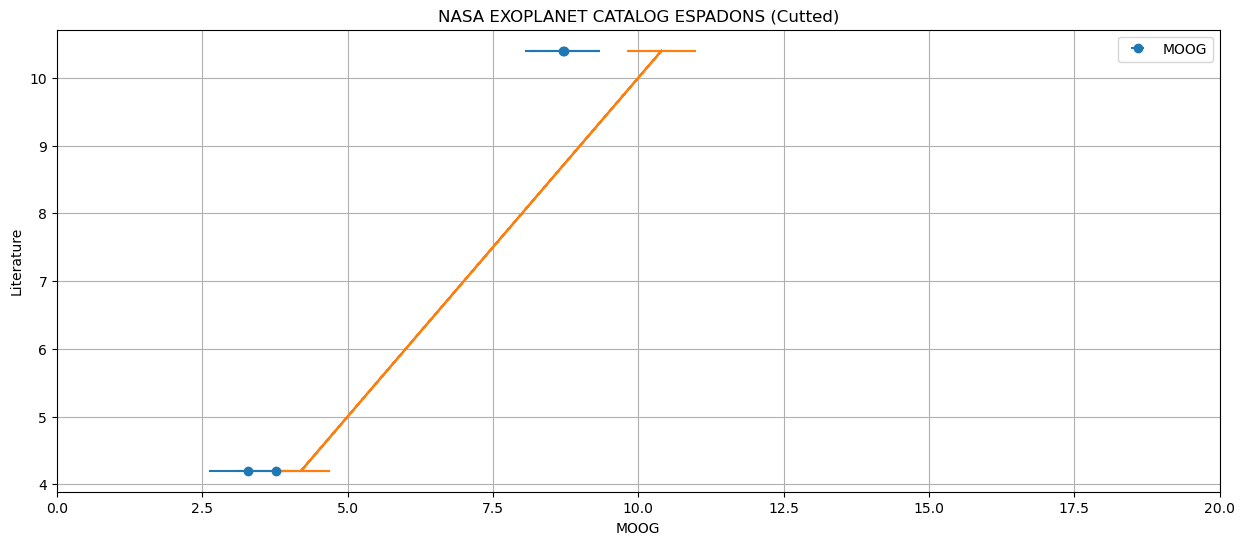

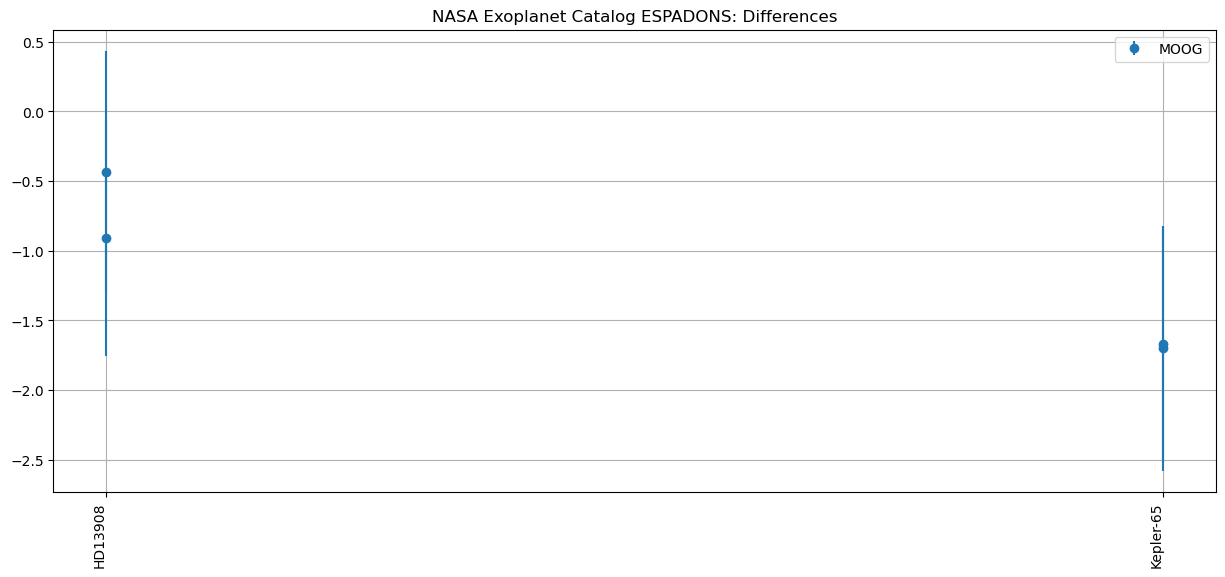

In [70]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA Exoplanet Catalog ESPADONS")
ax.errorbar(list(ESPADONS["Star"]),np.array(list(ESPADONS["vrot"])),yerr=list(ESPADONS["vsini_final_err"]), fmt="o",label="MOOG")
ax.errorbar(list(ESPADONS["Star"]),Nasa_exo_value_ESPADONS,yerr=Error_Nasa_ESPADONS, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG ESPADONS")
ax.errorbar(list(ESPADONS["vrot"]),Nasa_exo_value_ESPADONS,xerr=list(ESPADONS["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_ESPADONS,Nasa_exo_value_ESPADONS,xerr=Error_Nasa_ESPADONS)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG ESPADONS (Cutted)")
ax.errorbar(list(ESPADONS["vrot"]),Nasa_exo_value_ESPADONS,xerr=list(ESPADONS["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_ESPADONS,Nasa_exo_value_ESPADONS,xerr=Error_Nasa_ESPADONS)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,20)
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog ESPADONS: Differences")
ax.errorbar(list(ESPADONS["Star"]),np.array(list(ESPADONS["vrot"]))-np.array(Nasa_exo_value_ESPADONS),yerr=np.sqrt(np.array(list(ESPADONS["vsini_final_err"]))**2+np.array(Error_Nasa_ESPADONS)**2), fmt="o",label="MOOG")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

In [71]:
###Getting the mean values of the HARPS in the literature
FIES=All[All["spectograph"]=="FIES"]

Mean_FIES_literature=[]
Median_FIES_literature=[]
Standart_FIES_literature=[]
Nasa_exo_value_FIES=[]
Error_Nasa_FIES=[]


for i in range(len(list(FIES['Star']))):
    target_name=list(FIES["Star"])[i]
    target_value_mean=list(Literature_values[Literature_values["Star"]==target_name]["average: vsini (km/s)"])[0]
    target_standart_deviation=list(Literature_values[Literature_values["Star"]==target_name]["standard deviation: vsini (km/s)"])[0]
    nasa_value=list(Literature_values[Literature_values["Star"]==target_name]["nasa: vsini (km/s)"])[0]
    error_nasa=list(Literature_values[Literature_values["Star"]==target_name]["nasa: err_1"])[0]
    
    Mean_FIES_literature.append(target_value_mean)
    Standart_FIES_literature.append(target_standart_deviation)
    Nasa_exo_value_FIES.append(nasa_value)
    Error_Nasa_FIES.append(error_nasa)

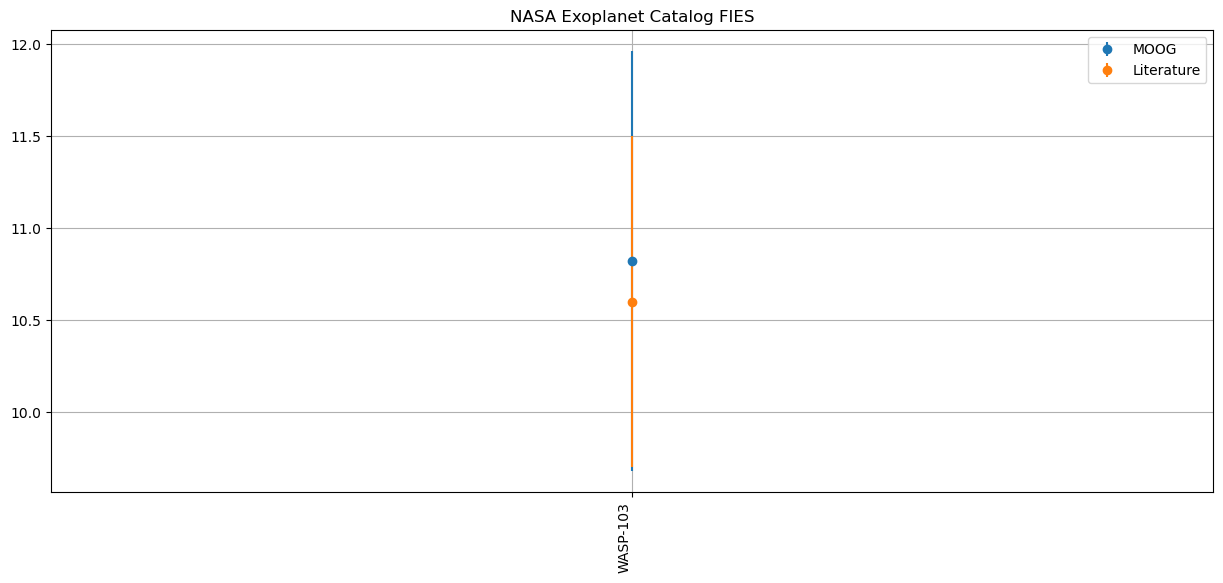

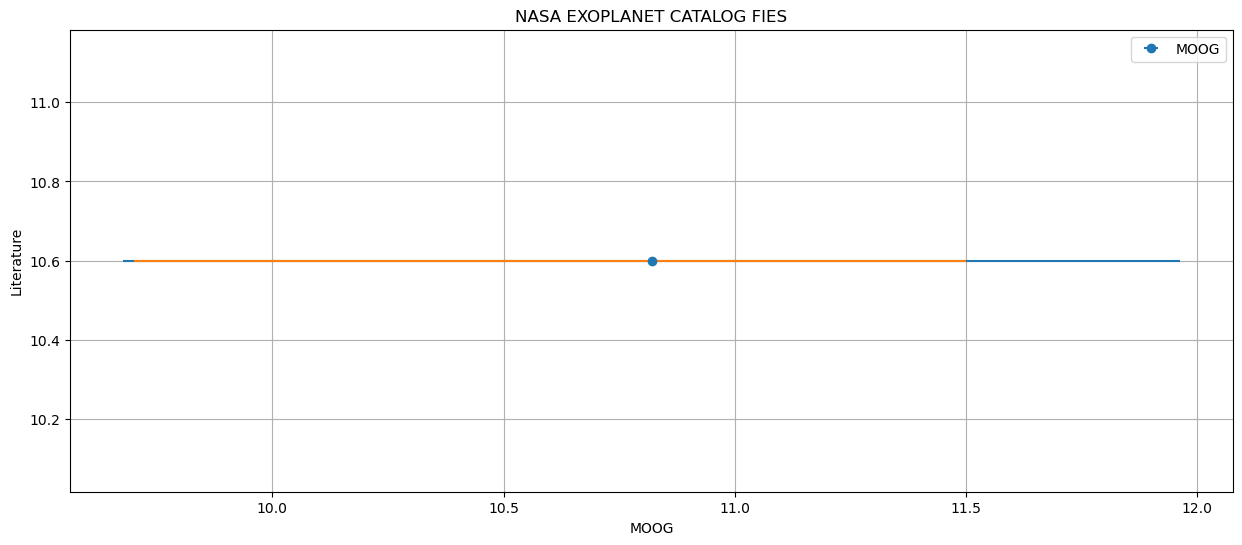

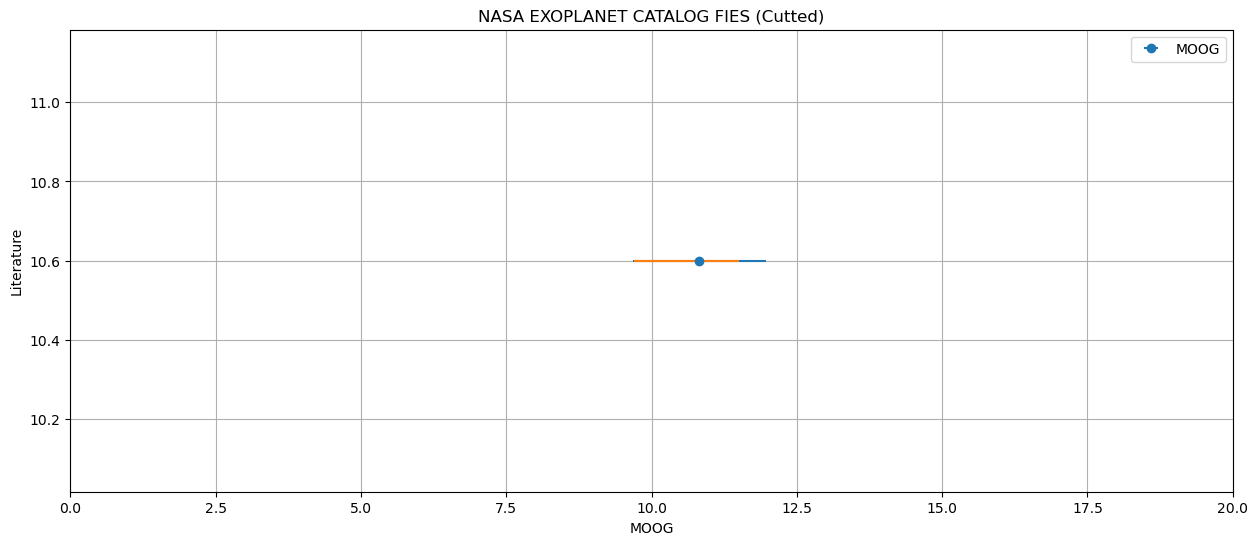

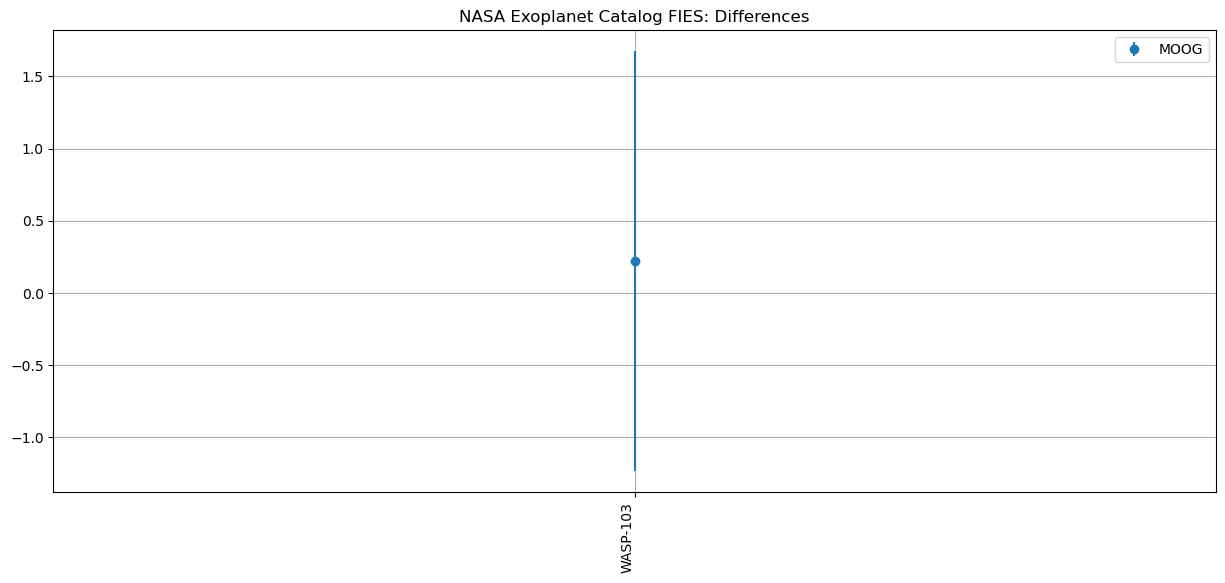

In [72]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA Exoplanet Catalog FIES")
ax.errorbar(list(FIES["Star"]),np.array(list(FIES["vrot"])),yerr=list(FIES["vsini_final_err"]), fmt="o",label="MOOG")
ax.errorbar(list(FIES["Star"]),Nasa_exo_value_FIES,yerr=Error_Nasa_FIES, fmt="o",label="Literature")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG FIES")
ax.errorbar(list(FIES["vrot"]),Nasa_exo_value_FIES,xerr=list(FIES["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_FIES,Nasa_exo_value_FIES,xerr=Error_Nasa_FIES)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.show()

fig, ax = plt.subplots(figsize=(15, 6))
plt.grid()
plt.title("NASA EXOPLANET CATALOG FIES (Cutted)")
ax.errorbar(list(FIES["vrot"]),Nasa_exo_value_FIES,xerr=list(FIES["vsini_final_err"]), fmt="o",label="MOOG")
plt.errorbar(Nasa_exo_value_FIES,Nasa_exo_value_FIES,xerr=Error_Nasa_FIES)
plt.legend()
plt.ylabel("Literature")
plt.xlabel("MOOG")
plt.xlim(0,20)
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog FIES: Differences")
ax.errorbar(list(FIES["Star"]),np.array(list(FIES["vrot"]))-np.array(Nasa_exo_value_FIES),yerr=np.sqrt(np.array(list(FIES["vsini_final_err"]))**2+np.array(Error_Nasa_FIES)**2), fmt="o",label="MOOG")
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

### UVES

In [73]:
Instr_broad_UVES = [0.061, 0.087, 0.11, 0.13]

# Getting the mean values of the HARPS in the literature


Mean_UVES_literature = np.zeros(())
Median_UVES_literature = []
Standart_UVES_literature = []
Nasa_exo_value_UVES = []
Error_Nasa_UVES = []

z=0

for k in Instr_broad_UVES:
    UVES = All[All["Inst_broad"] == k]
    for i in range(len(list(UVES['Star']))):
        target_name = list(UVES["Star"])[i]
        target_value_mean = list(
            Literature_values[Literature_values["Star"] == target_name]["average: vsini (km/s)"])[0]
        target_standart_deviation = list(
            Literature_values[Literature_values["Star"] == target_name]["standard deviation: vsini (km/s)"])[0]
        nasa_value = list(
            Literature_values[Literature_values["Star"] == target_name]["nasa: vsini (km/s)"])[0]
        error_nasa = list(
            Literature_values[Literature_values["Star"] == target_name]["nasa: err_1"])[0]

        Mean_UVES_literature.append(target_value_mean)
        Standart_UVES_literature.append(target_standart_deviation)
        Nasa_exo_value_UVES.append(nasa_value)
        Error_Nasa_UVES.append(error_nasa)
    z+=1

AttributeError: 'numpy.ndarray' object has no attribute 'append'

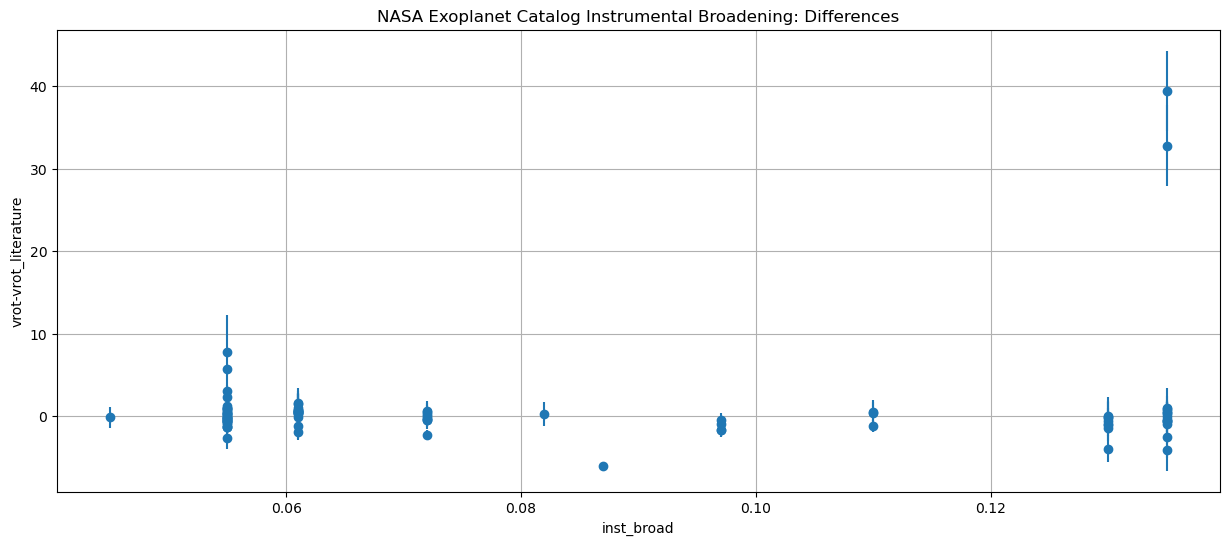

In [81]:
fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog Instrumental Broadening: Differences")
ax.errorbar(list(All["Inst_broad"]),np.array(list(All["vrot"]))-np.array(Nasa_exo_value_All),fmt="o",yerr=np.sqrt(np.array(list(All["vsini_final_err"]))**2+np.array(Error_Nasa_All)**2))
plt.xlabel("inst_broad")
plt.ylabel("vrot-vrot_literature")
plt.show()

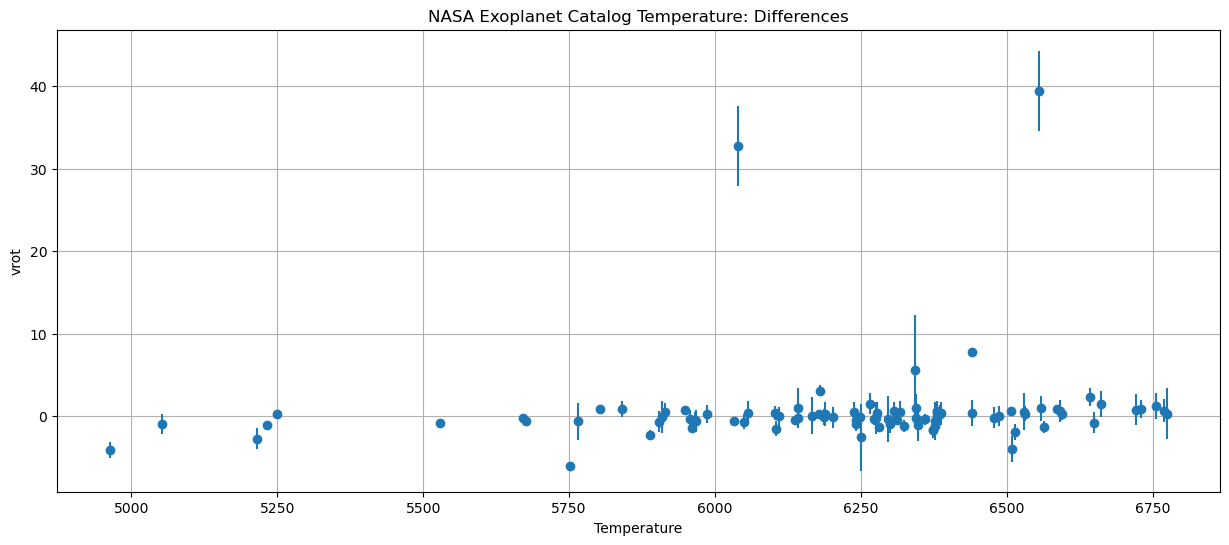

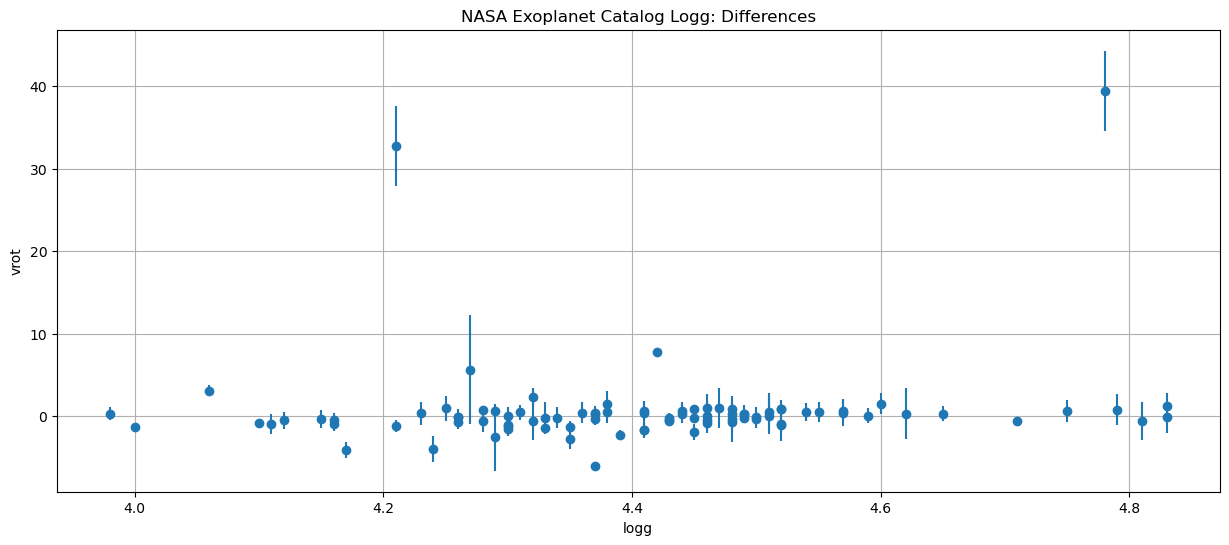

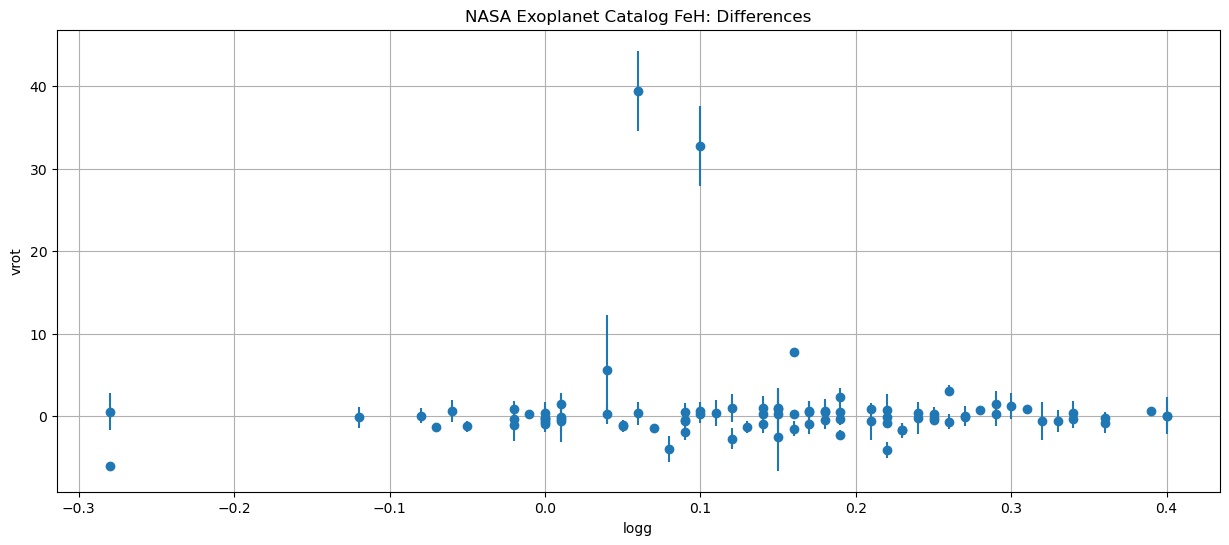

In [85]:
fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog Temperature: Differences")
ax.errorbar(list(All["teff"]),np.array(list(All["vrot"]))-np.array(Nasa_exo_value_All),fmt="o",yerr=np.sqrt(np.array(list(All["vsini_final_err"]))**2+np.array(Error_Nasa_All)**2))
plt.xlabel("Temperature")
plt.ylabel("vrot")
plt.show()


fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog Logg: Differences")
ax.errorbar(list(All["logg"]),np.array(list(All["vrot"]))-np.array(Nasa_exo_value_All),fmt="o",yerr=np.sqrt(np.array(list(All["vsini_final_err"]))**2+np.array(Error_Nasa_All)**2))
plt.xlabel("logg")
plt.ylabel("vrot")
plt.show()

fig, ax = plt.subplots(figsize=(15,6))
plt.grid()
plt.title("NASA Exoplanet Catalog FeH: Differences")
ax.errorbar(list(All["feh"]),np.array(list(All["vrot"]))-np.array(Nasa_exo_value_All),fmt="o",yerr=np.sqrt(np.array(list(All["vsini_final_err"]))**2+np.array(Error_Nasa_All)**2))
plt.xlabel("logg")
plt.ylabel("vrot")
plt.show()
